In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from plot import * 
from solvers import * 

### Initial conditions

In [2]:
N = 13000000
R0 = 200000
I0 = 200000
r = 3e-1
e = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
Istar = r/e
Jstar = gamma*N

### Vanilla SIR

In [3]:
beta = beta0
tsteps = 160
t = np.linspace(0, tsteps-1, 5*tsteps) #number of timesteps is tsteps

In [4]:
S, I, R = solve_sir(S0, I0, R0, N, beta, gamma, t)
J = beta*S

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


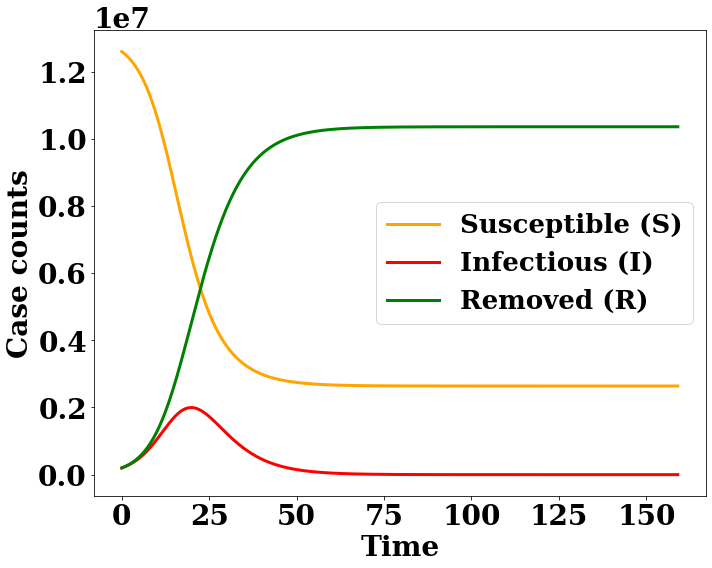

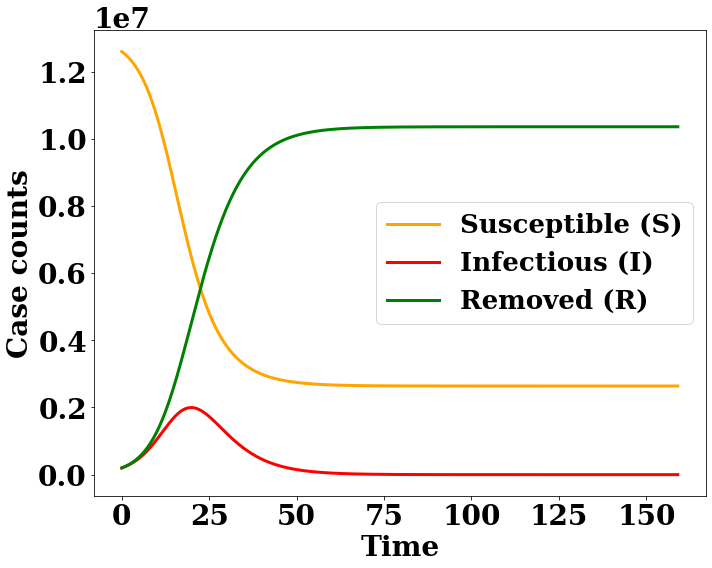

In [5]:
plt_title=''
plot_sir_withoutJ(S, I, R, t, plt_title, fig_name= 'plots/VanillaSIR.png')
plot_sir_withoutJ(S, I, R, t, plt_title, fig_name= 'plots/VanillaSIR.eps')

### LV system

In [6]:
b = 1/N
d = gamma

In [7]:
x0 = beta0*S0
y0 = I0

In [8]:
X, Y = solve_lv(x0, y0, r, e, b, d, t)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


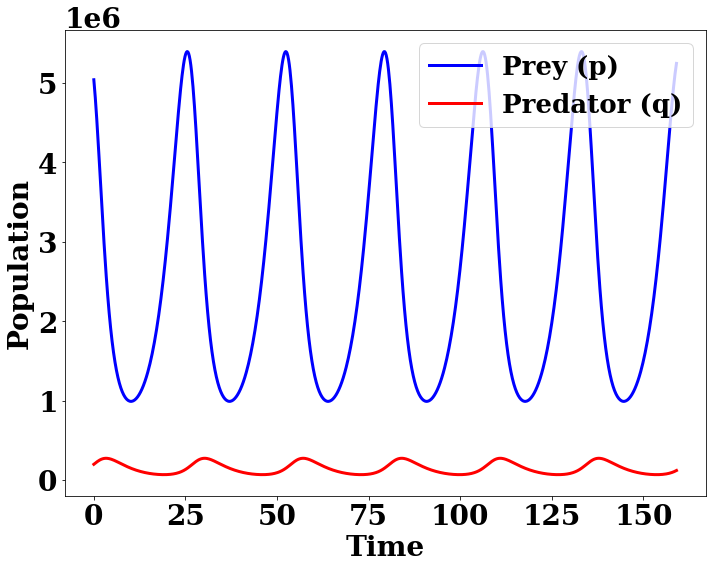

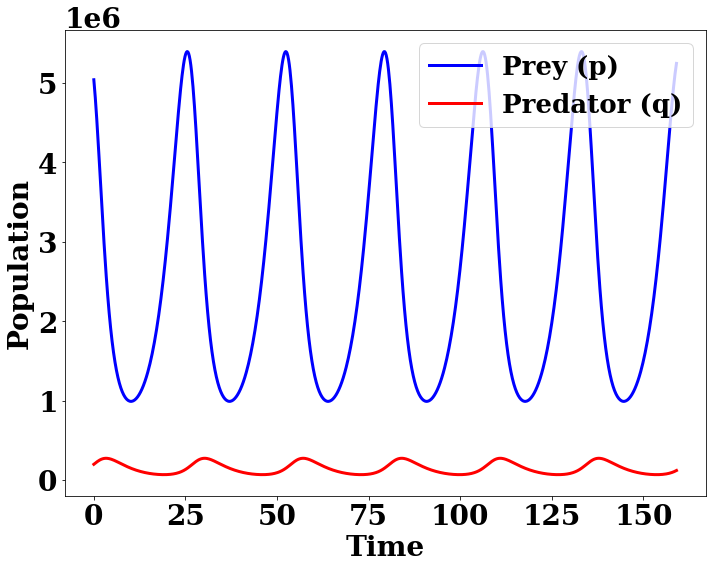

In [9]:
plt_title=''
plot_lv(X, Y, t, plt_title, fig_name='plots/LV.png')
plot_lv(X, Y, t, plt_title, fig_name='plots/LV.eps')

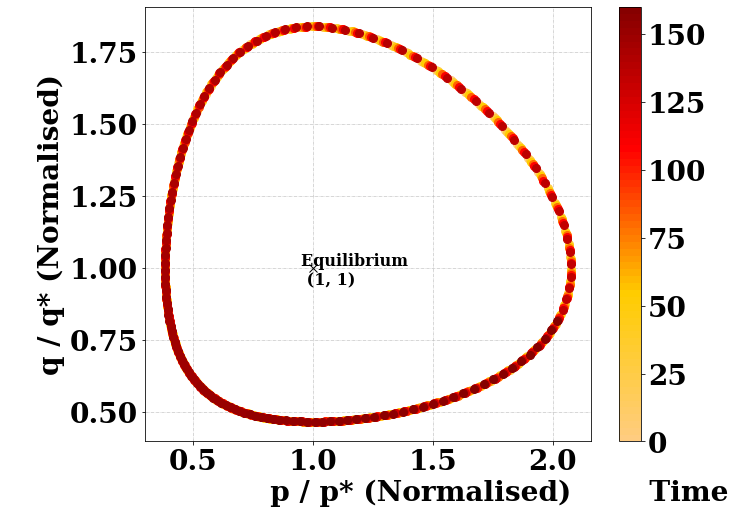

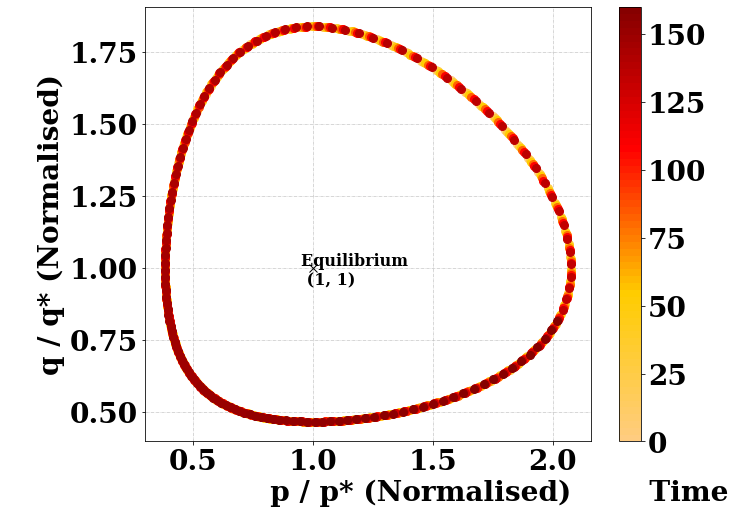

In [10]:
plt_title = ''
plot_limit_cycle_color_gradient(X/Jstar, Y/Istar, plt_title = '', xlabel = 'p / p* (Normalised)',
                                ylabel= 'q / q* (Normalised)', fig_name ='plots/lv_limitingCycle.png', xyscale = 'linear',
                                start = 0, stop = len(X), eta = None )

plot_limit_cycle_color_gradient(X/Jstar, Y/Istar, plt_title = '', xlabel = 'p / p* (Normalised)',
                                ylabel= 'q / q* (Normalised)', fig_name ='plots/lv_limitingCycle.eps', xyscale = 'linear',
                                start = 0, stop = len(X), eta = None )

### LV system equilibrium

In [11]:
y0 = r/e
x0 = d/b

In [12]:
X, Y = solve_lv(x0, y0, r, e, b, d, t)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


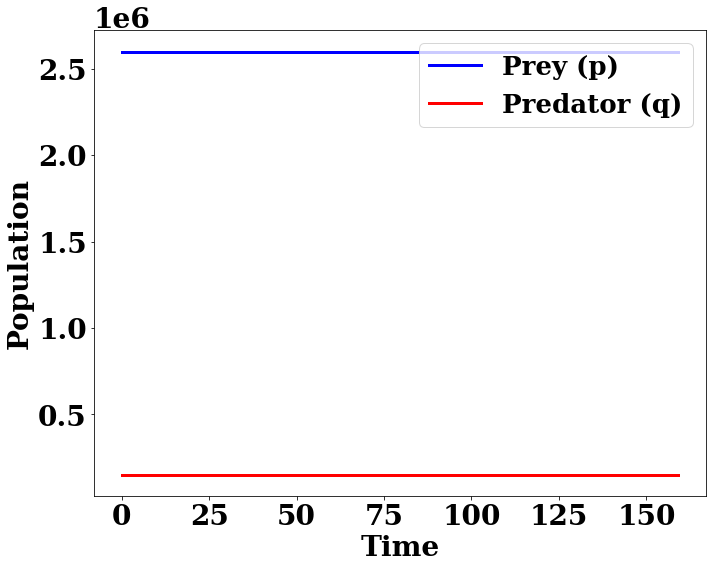

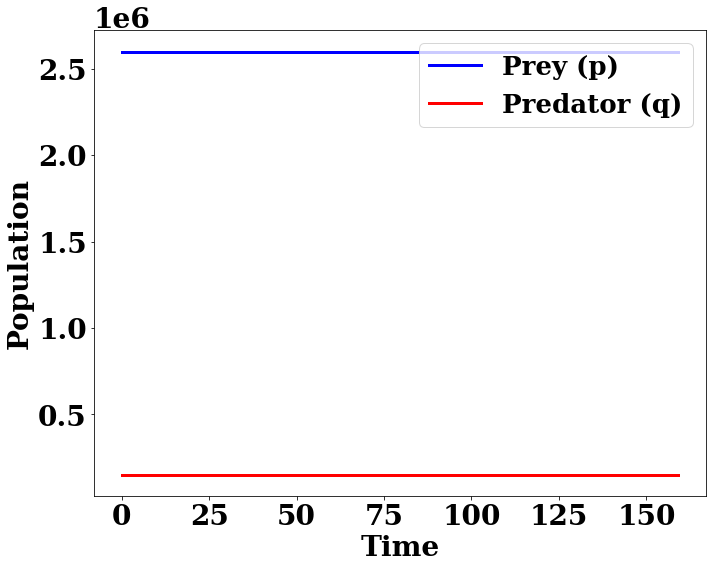

In [13]:
plt_title = ''
plot_lv(X, Y, t, plt_title, fig_name='plots/LV-equilibrium.png')
plot_lv(X, Y, t, plt_title, fig_name='plots/LV-equilibrium.eps')

### SIR-LV

In [14]:
I0 = 200000
S0 = N - I0 - R0
tsteps = 400
t = np.linspace(0, tsteps-1, 5*tsteps) #number of timesteps is tsteps

In [15]:
S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
J = beta*S

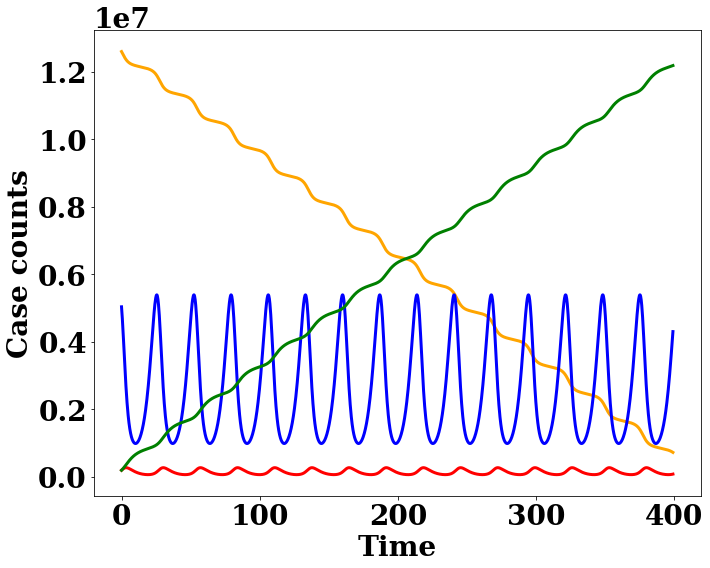

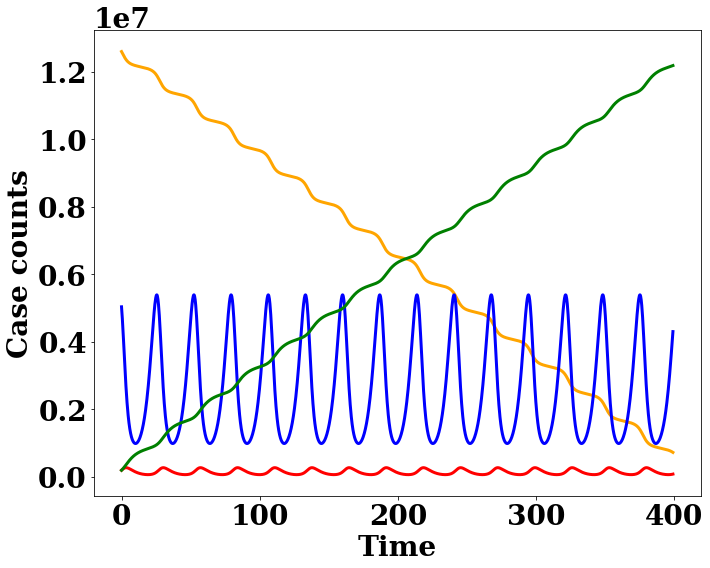

In [16]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name='plots/SIR-LV_dynamics-non_equlibrium_2.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name='plots/SIR-LV_dynamics-non_equlibrium_2.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


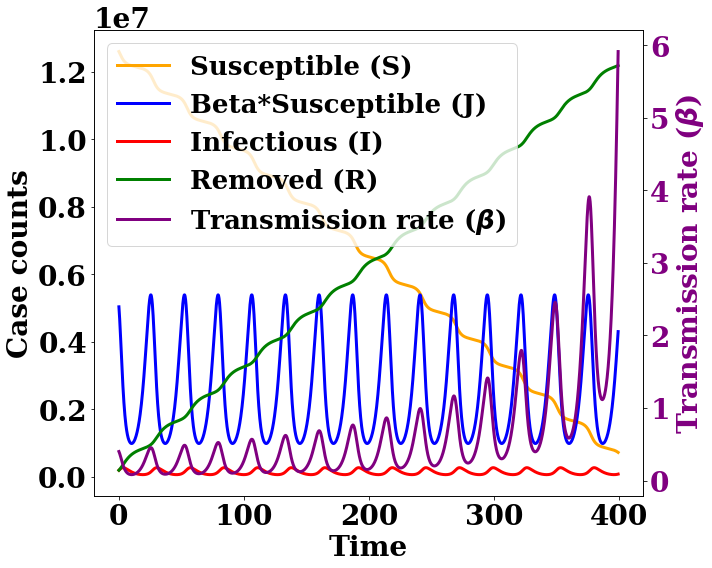

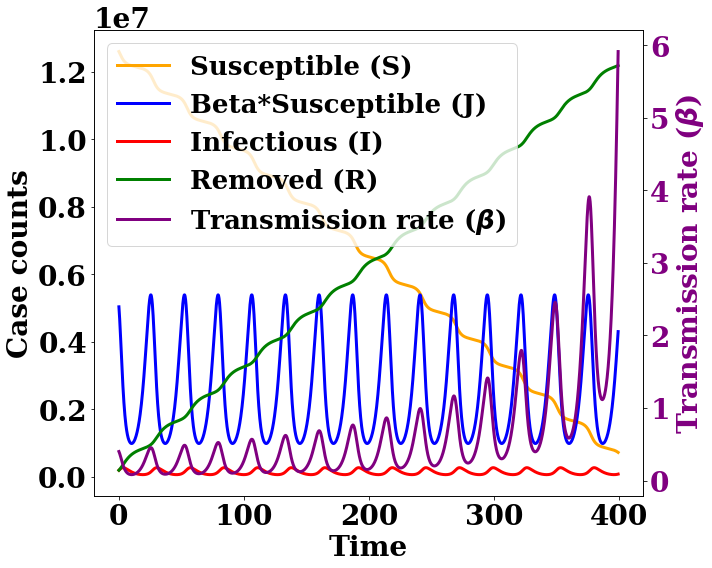

In [17]:
plot_sir_lv_withBeta(S, I, R, J, beta, t, plt_title='', fig_name='plots/SIR-LV_beta_dynamics-non_equlibrium_2.png')
plot_sir_lv_withBeta(S, I, R, J, beta, t, plt_title='', fig_name='plots/SIR-LV_beta_dynamics-non_equlibrium_2.eps')

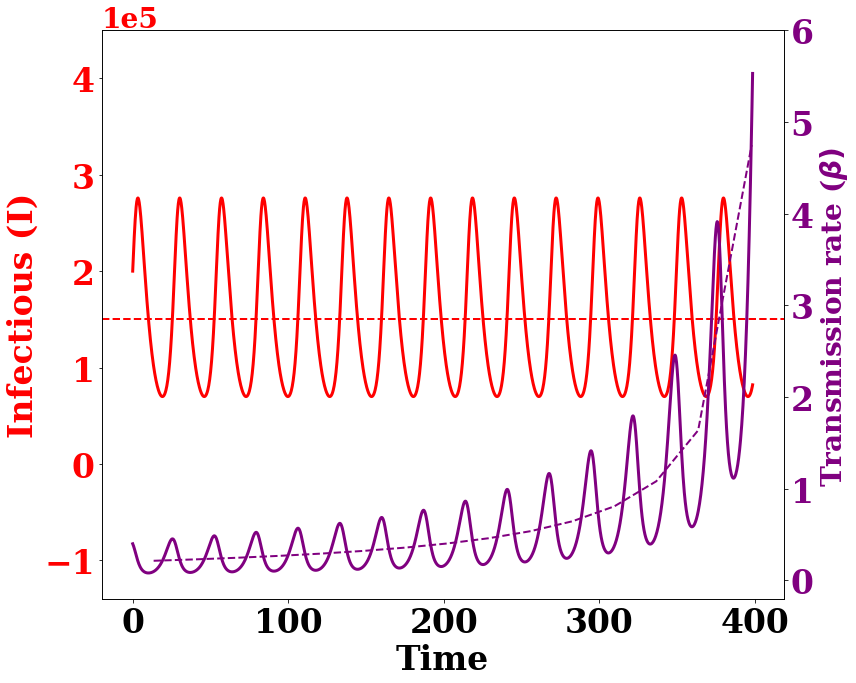

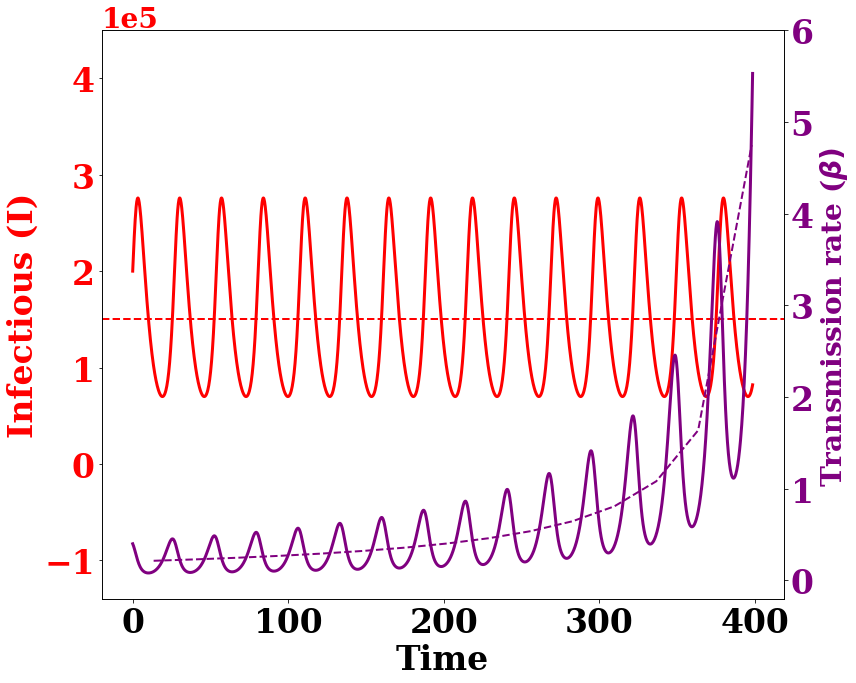

In [18]:
plot_beta_I(beta[:-2], I[:-2], t[:-2], Ilim = (-140000, 450000), betalim = (-0.2, 6), Istar=(r/e), plt_title='', fig_name='plots/SIR-LV_beta-I-non_equilibrium_2.png')
plot_beta_I(beta[:-2], I[:-2], t[:-2], Ilim = (-140000, 450000), betalim = (-0.2, 6), Istar=(r/e), plt_title='', fig_name='plots/SIR-LV_beta-I-non_equilibrium_2.eps')

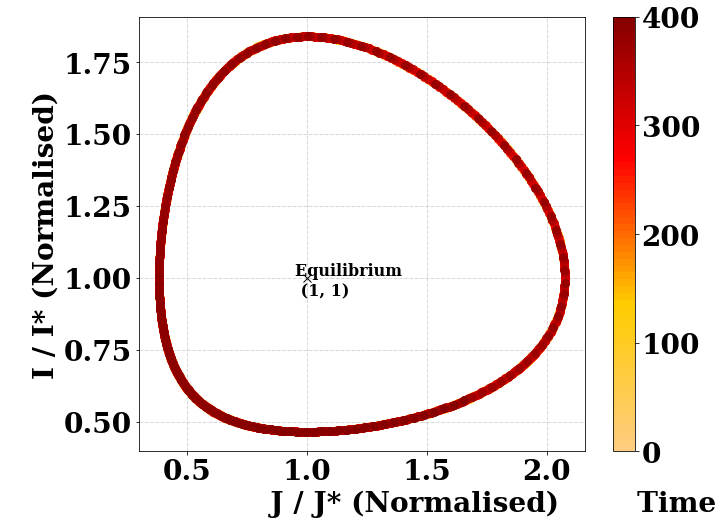

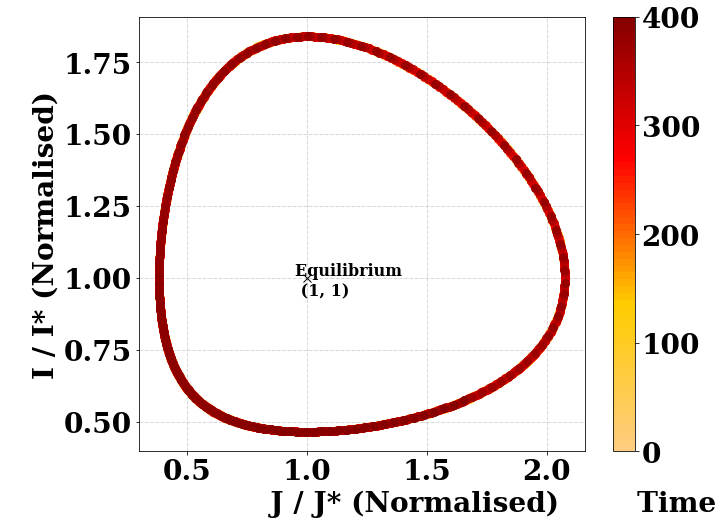

In [19]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infectious',
#                  fig_name='SIR-LV-non-equilibrium_2_limit_cycle.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name ='plots/SIR-LV-non-equilibrium_2_limit_cycle.png', xyscale = 'linear',
                                start = 0, stop = len(J), eta = None )

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name ='plots/SIR-LV-non-equilibrium_2_limit_cycle.eps', xyscale = 'linear',
                                start = 0, stop = len(J), eta = None )

In [20]:
I0 = 100000
S0 = N - I0 - R0

In [21]:
S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
J = beta*S

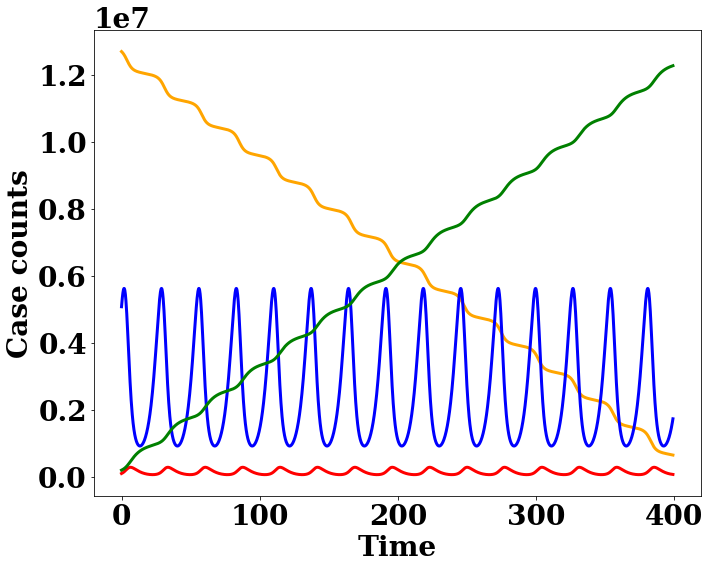

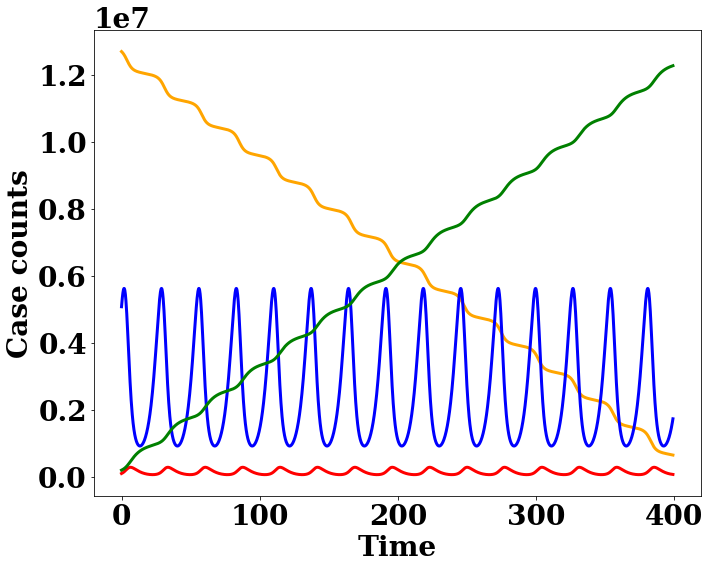

In [22]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name='plots/SIR-LV_dynamics-non_equlibrium_1.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name='plots/SIR-LV_dynamics-non_equlibrium_1.eps')

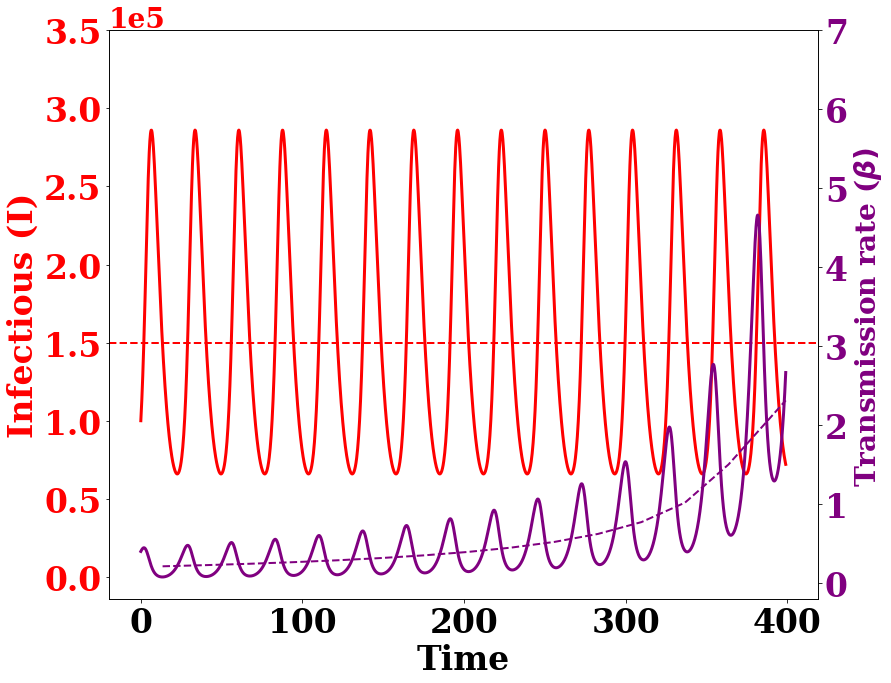

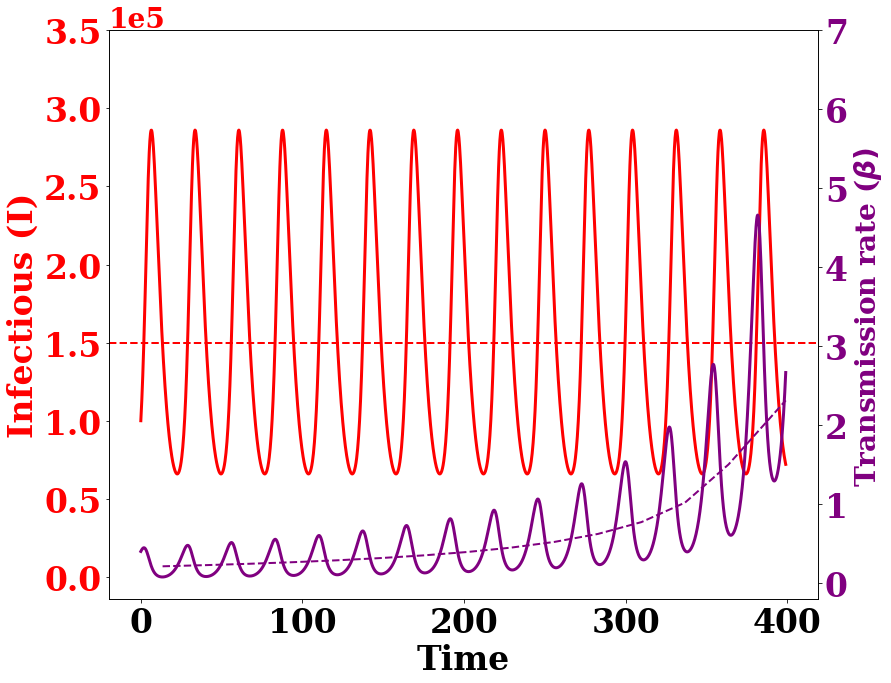

In [23]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', fig_name='plots/SIR-LV_beta-I-non_equilibrium_1.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', fig_name='plots/SIR-LV_beta-I-non_equilibrium_1.eps')

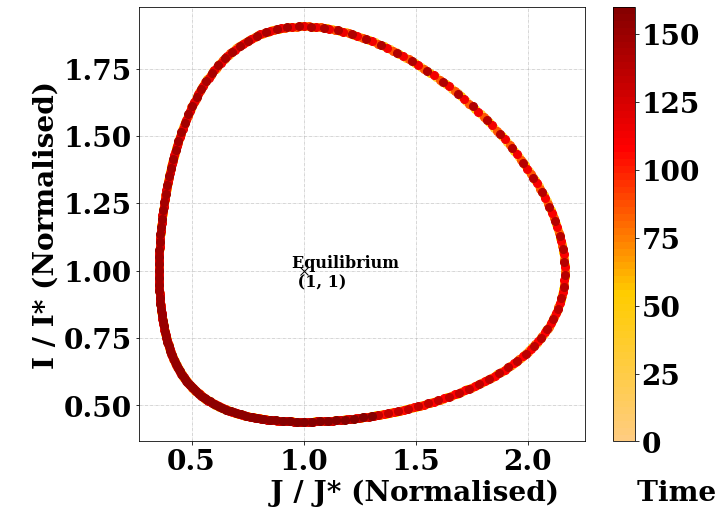

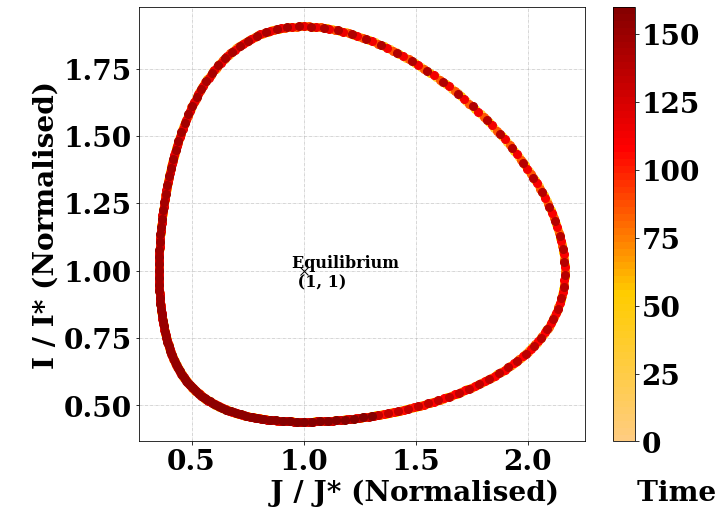

In [24]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infectious',
#                  fig_name='SIR-LV-non-equilibrium_2_limit_cycle.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name ='plots/SIR-LV-non-equilibrium_1_limit_cycle.png', xyscale = 'linear',
                                start = 0, stop = len(X) , eta = None)

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name ='plots/SIR-LV-non-equilibrium_1_limit_cycle.eps', xyscale = 'linear',
                                start = 0, stop = len(X), eta = None)

### Equilibrium case

In [25]:
r = 3e-1
e = 2e-6
I0 = r/e
R0 = 200000
S0 = N - I0 - R0
beta0 = gamma*N/S0
tsteps = 403
t = np.linspace(0, tsteps-1, tsteps) #number of timesteps is tsteps

In [26]:
print(f'S0={S0}, I0={I0}, R0={R0}')

S0=12650000.0, I0=150000.0, R0=200000


In [27]:
S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
J = beta*S

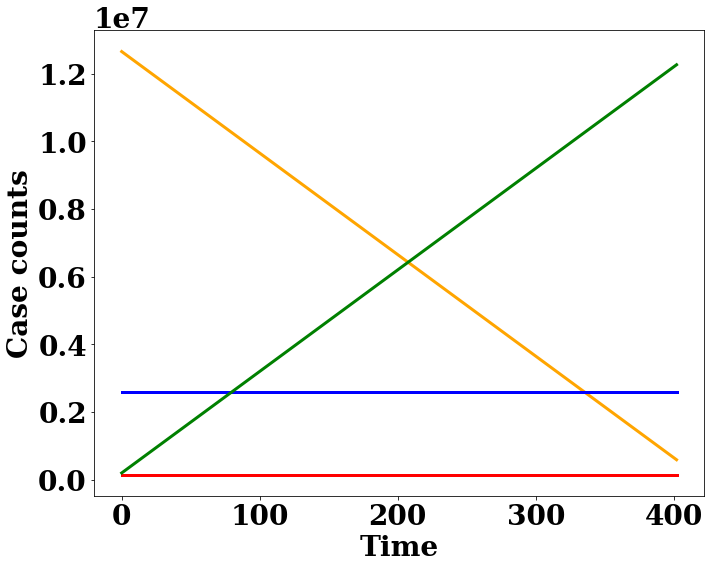

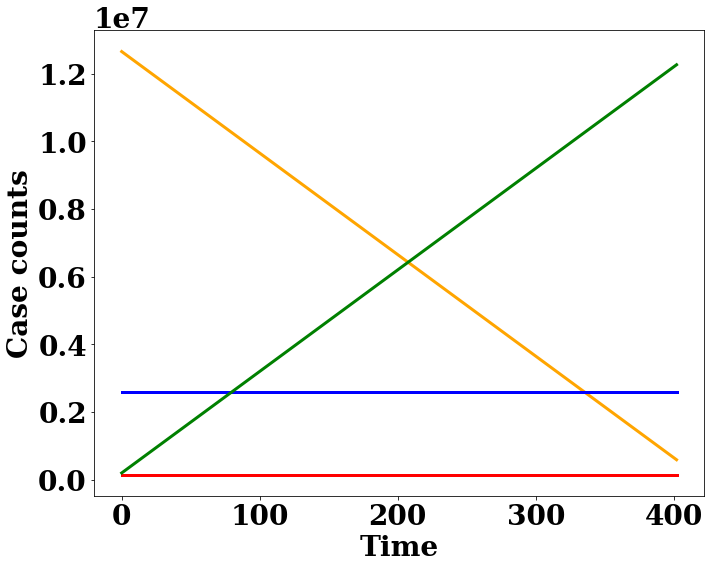

In [28]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name='plots/SIR-LV_dynamics-equlibrium.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name='plots/SIR-LV_dynamics-equlibrium.eps')

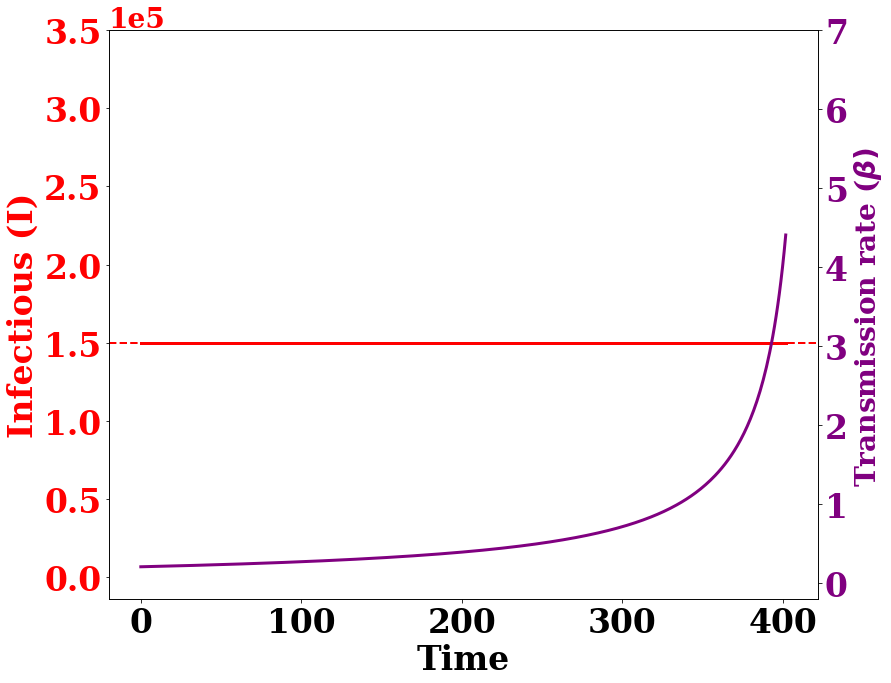

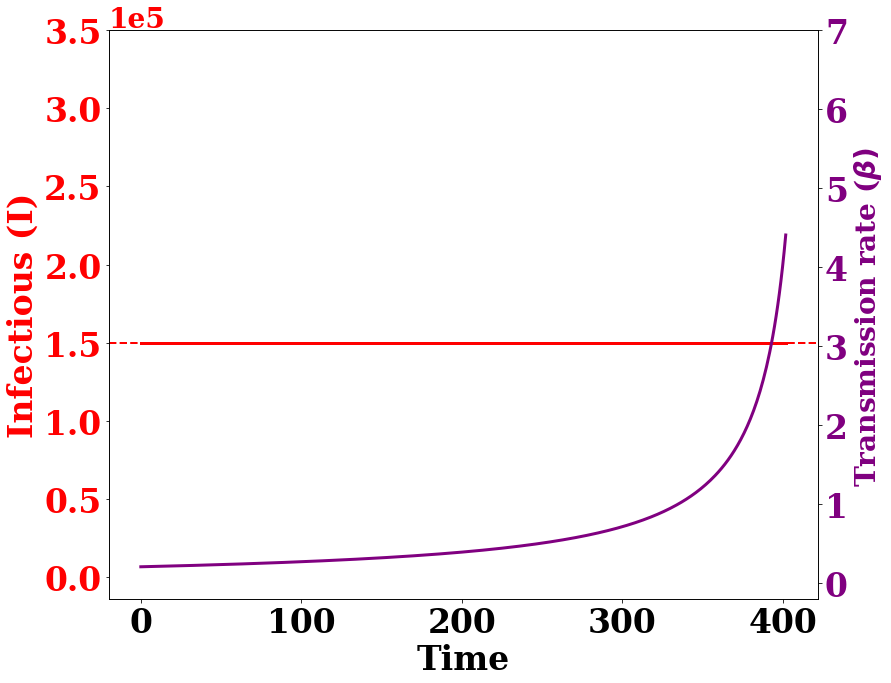

In [29]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', betaMeanFlag = False, fig_name='plots/SIR-LV_beta-I-equilibrium.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', betaMeanFlag = False, fig_name='plots/SIR-LV_beta-I-equilibrium.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


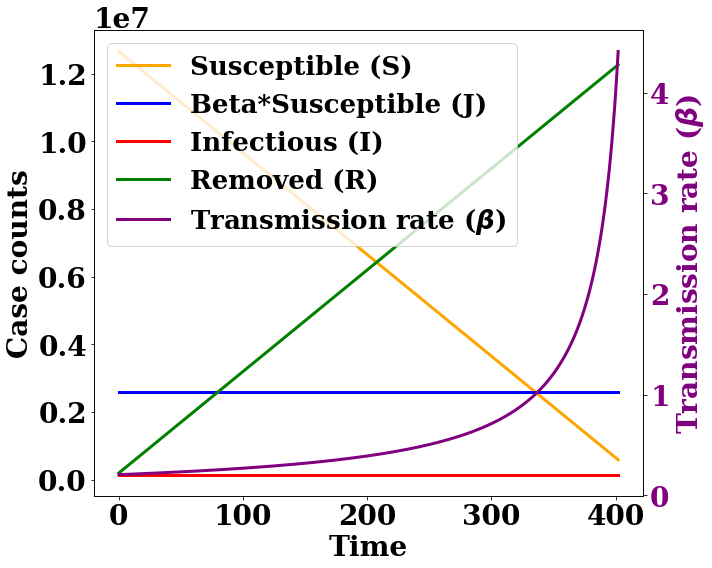

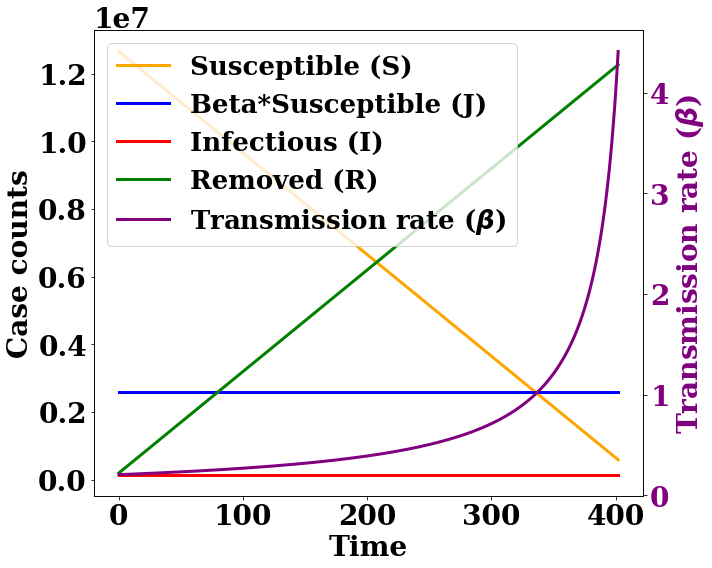

In [30]:
plot_sir_lv_withBeta(S, I, R, J, beta, t, plt_title='', fig_name='plots/SIR-LV_dynamics_with_beta-equlibrium.png')
plot_sir_lv_withBeta(S, I, R, J, beta, t, plt_title='', fig_name='plots/SIR-LV_dynamics_with_beta-equlibrium.eps')

### SIR-LV with control

### Re-initialise the variables

In [29]:
N = 13000000
R0 = 200000
I0 = 200000
r = 3e-1
e = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = gamma*N/S0
Istar = r/e
Jstar = gamma*N

### eta = 1

In [30]:
eta = 1*gamma

In [31]:
tsteps = 400
t = np.linspace(0, tsteps-1, 5*tsteps)

In [32]:
S, I, R, beta = solve_sir_lv_control(S0, I0, R0, beta0, N, r, e, gamma, eta, t)
J = beta*S

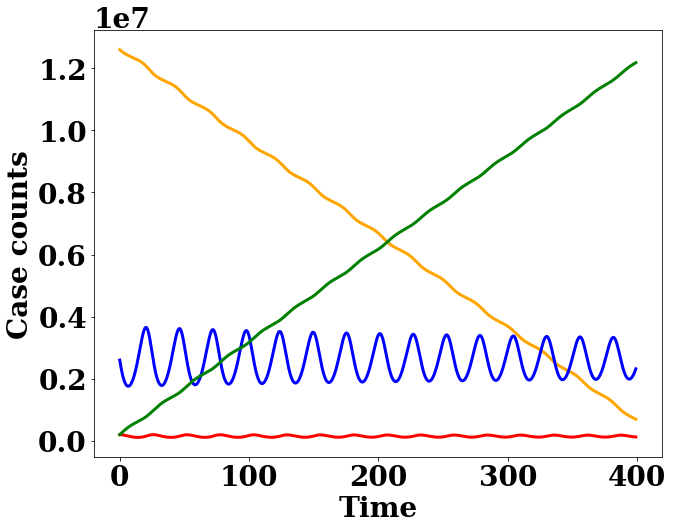

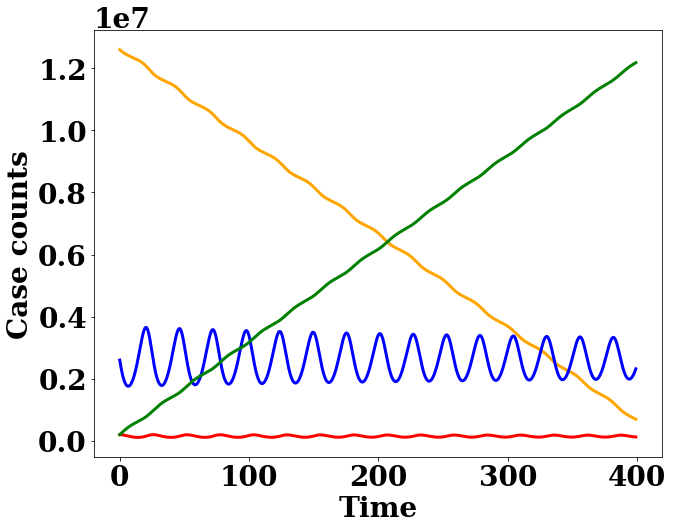

In [33]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.eps')

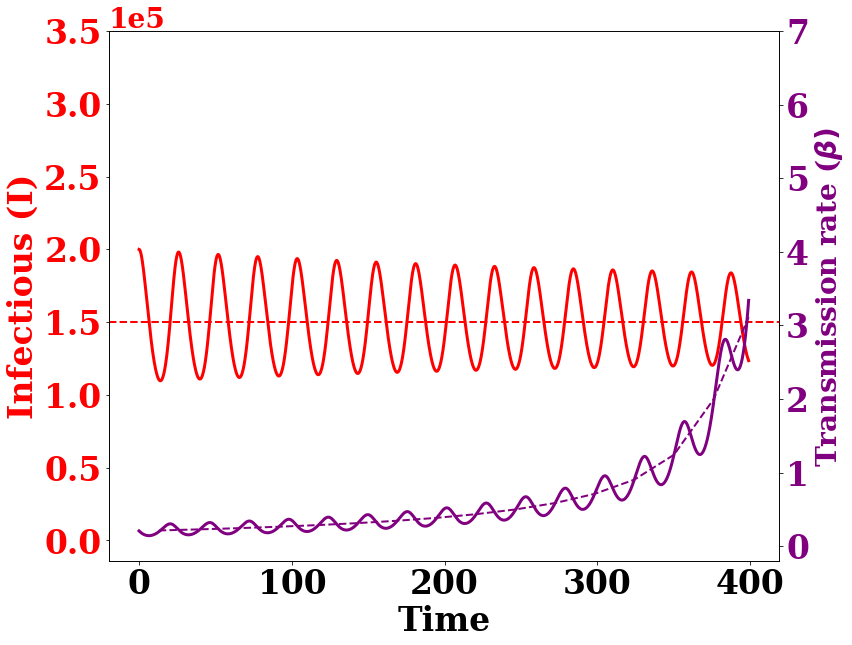

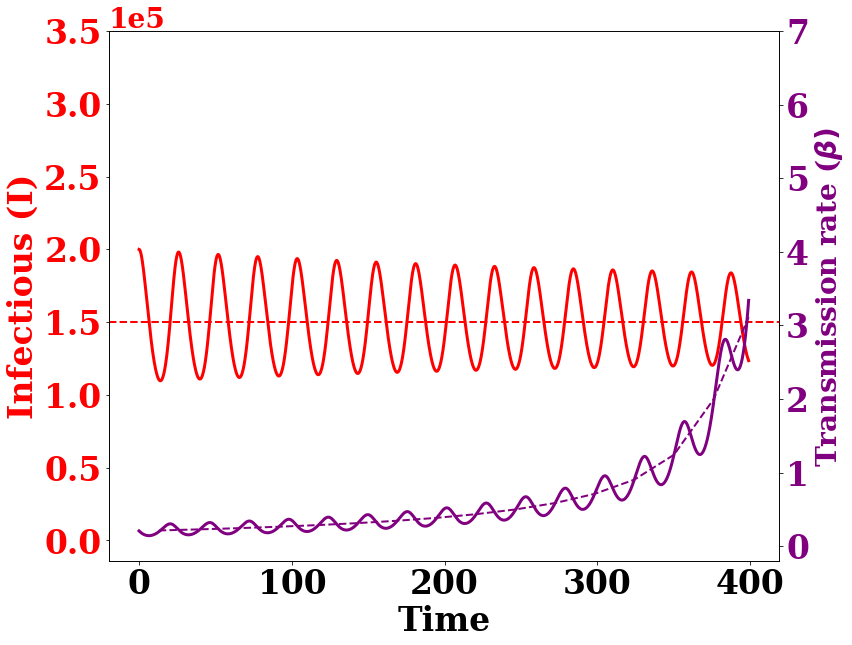

In [34]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.eps')


In [35]:
# plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), plt_title='', fig_name=f'plotsFinal/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.png')
# plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), plt_title='', fig_name=f'plotsFinal/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


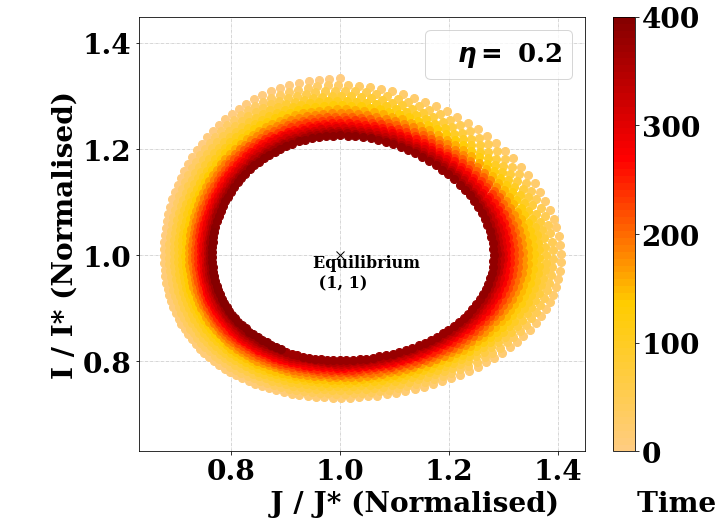

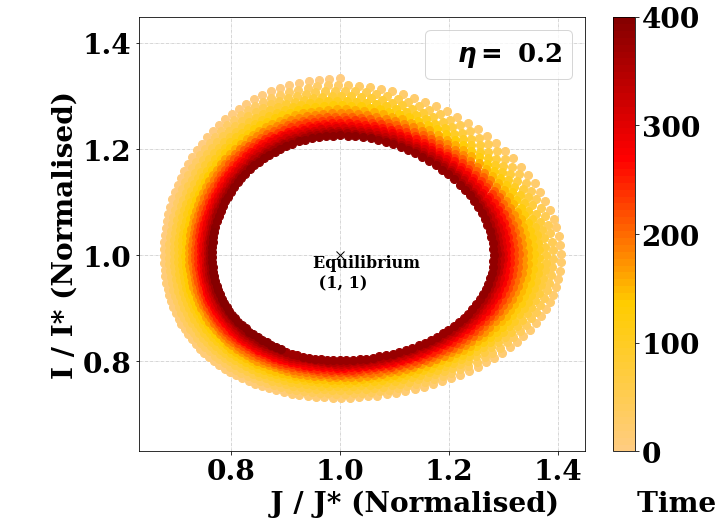

In [36]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infected',
#                  fig_name=f'SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png', xyscale = 'linear',
                                start = 0, stop = len(J), eta = eta)

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.eps', xyscale = 'linear',
                                start = 0, stop = len(J), eta = eta)

### eta = 5

In [37]:
eta = 5*gamma

In [38]:
S, I, R, beta = solve_sir_lv_control(S0, I0, R0, beta0, N, r, e, gamma, eta, t)
J = beta*S

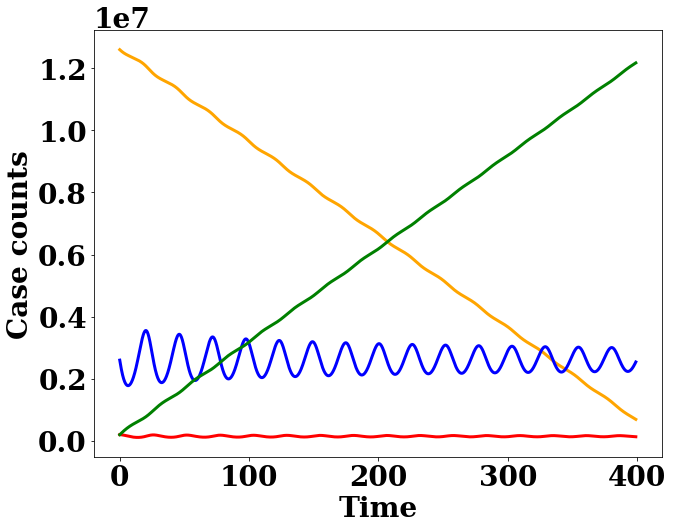

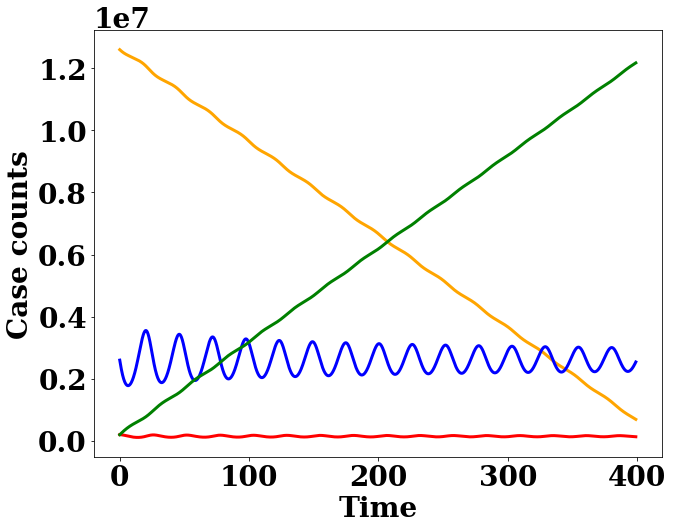

In [39]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.eps')

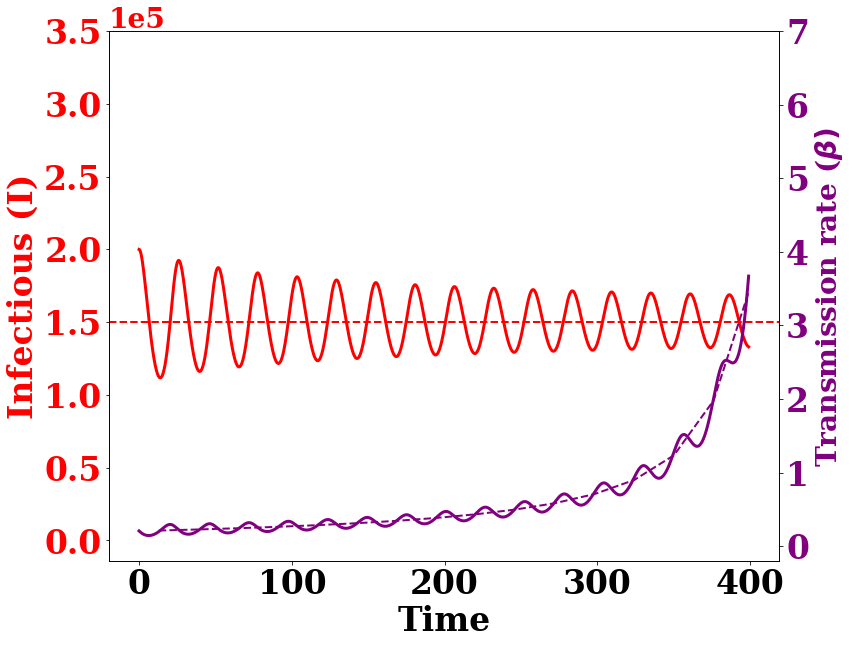

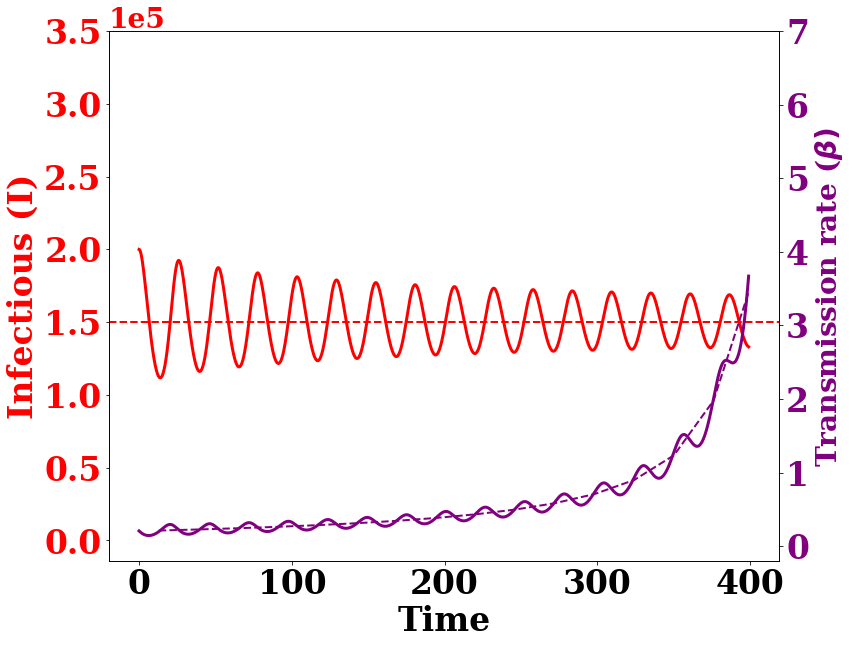

In [40]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.eps')


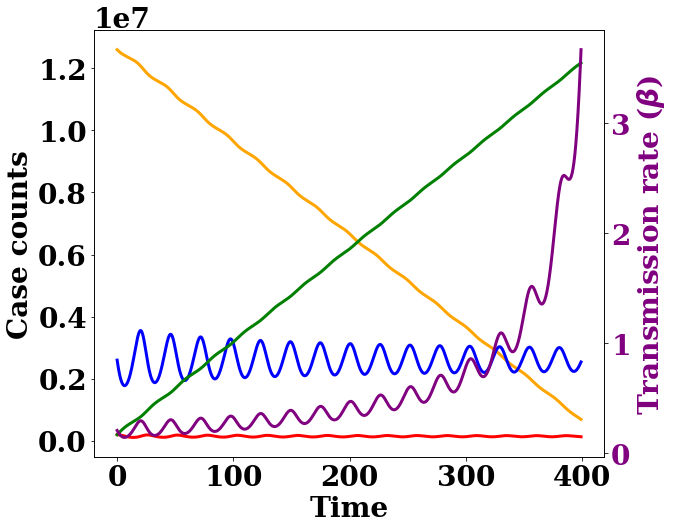

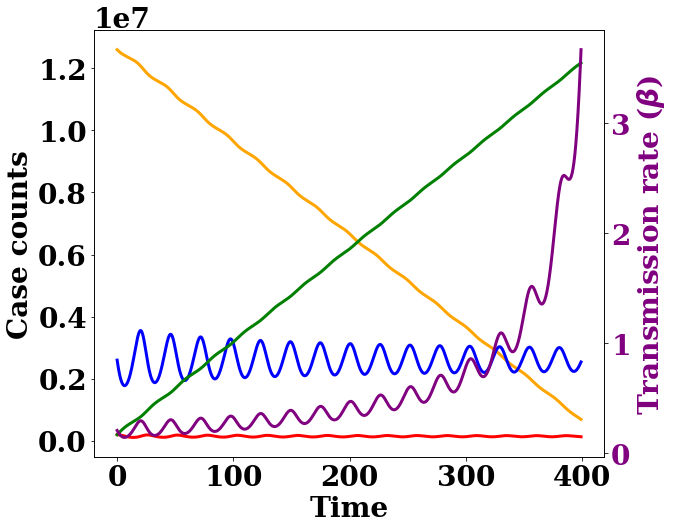

In [41]:
plot_sir_lv_withBeta(S, I, R, J, beta, t, plt_title='', fig_name= f'plots/SIR-LV-control_dynamics_withBeta_eta_{eta}.png')
plot_sir_lv_withBeta(S, I, R, J, beta, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_withBeta_eta_{eta}.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


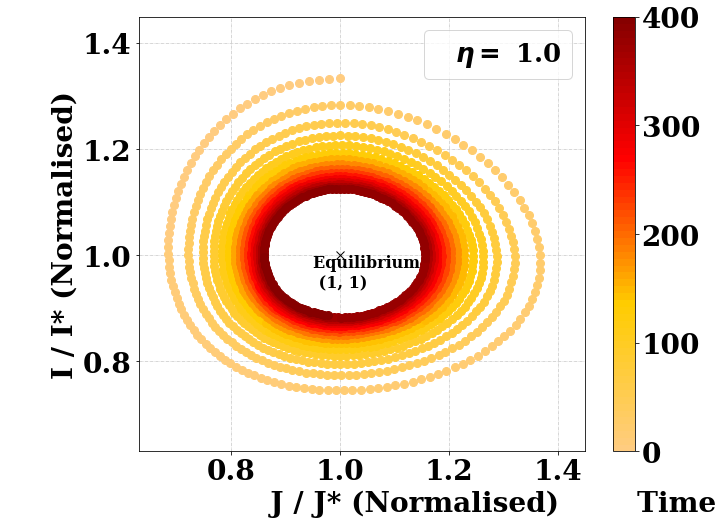

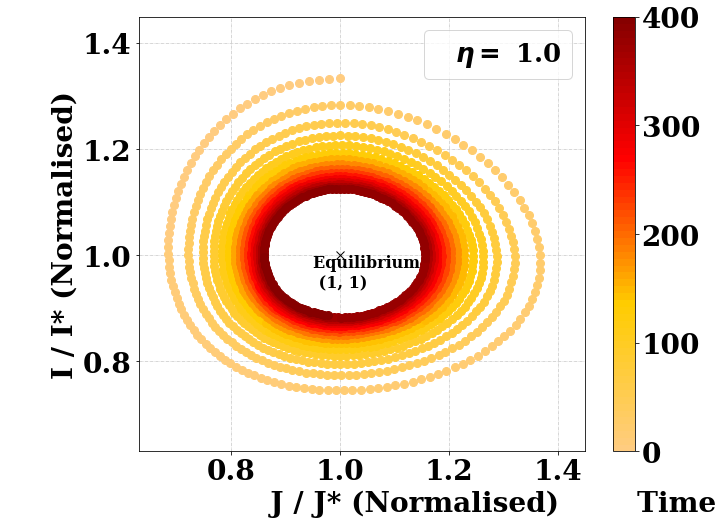

In [44]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infected',
#                  fig_name=f'SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png', xyscale = 'linear',
                                start = 0, stop = len(J) , eta = eta)

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.eps', xyscale = 'linear',
                                start = 0, stop = len(J), eta = eta)

### eta = 10

In [45]:
eta = 10*gamma

In [46]:
S, I, R, beta = solve_sir_lv_control(S0, I0, R0, beta0, N, r, e, gamma, eta, t)
J = beta*S

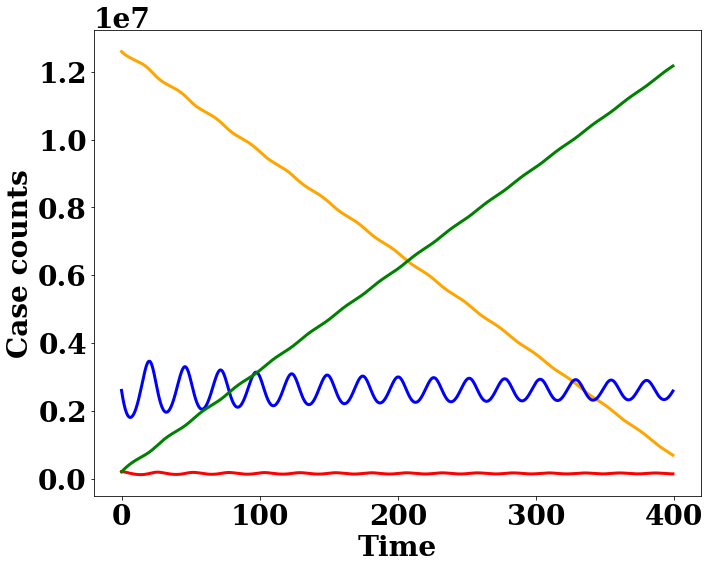

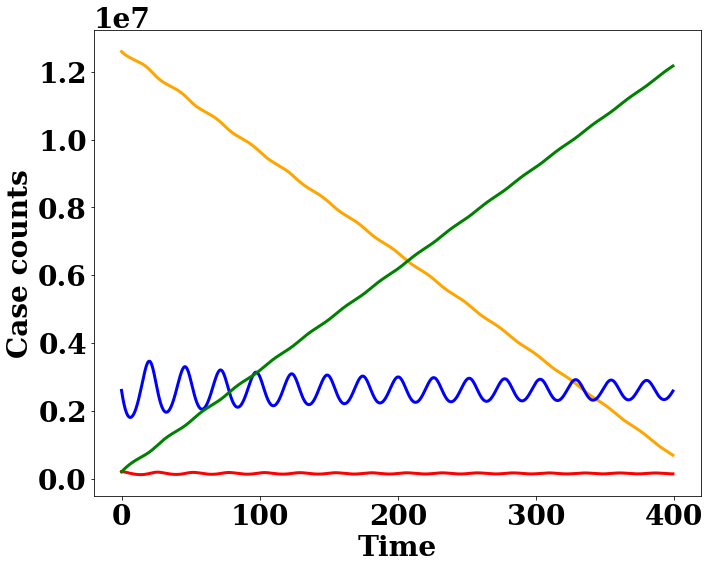

In [47]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.eps')

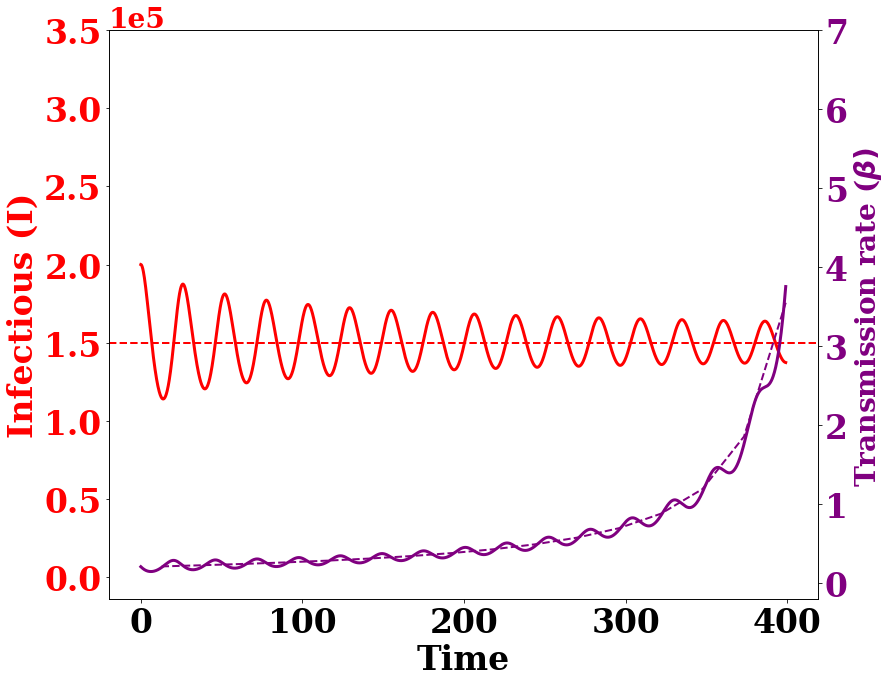

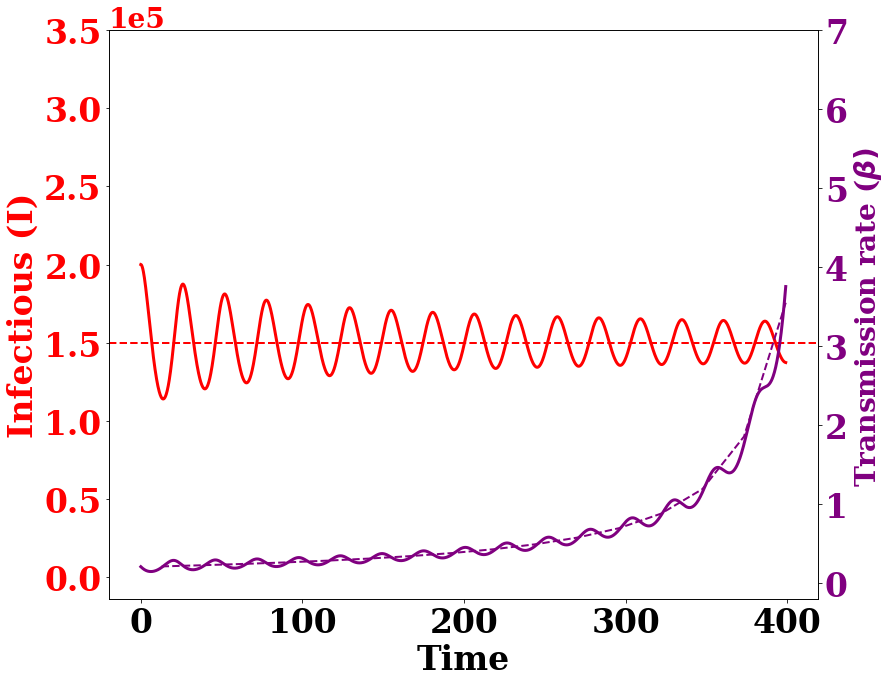

In [48]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7), Istar = (r/e) ,  plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7),  Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


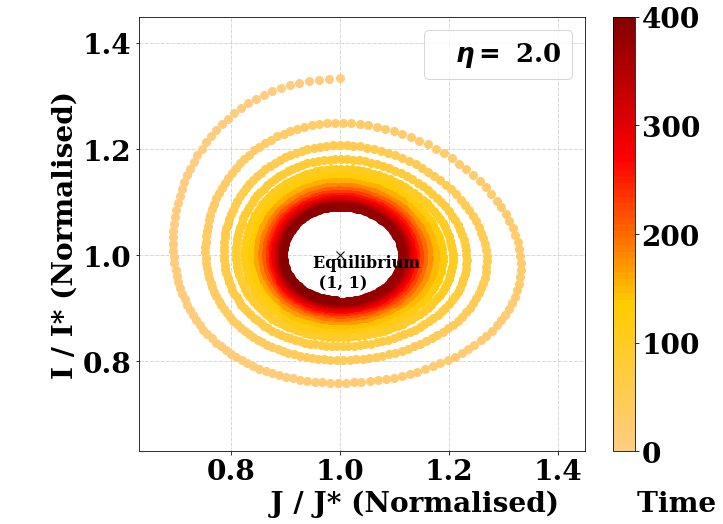

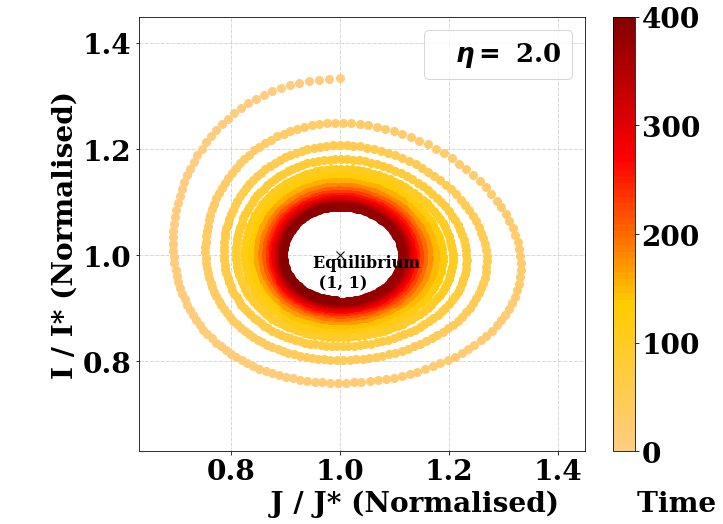

In [49]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infected',
#                  fig_name=f'SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png', xyscale = 'linear',
                                start = 0, stop = len(J), eta = eta)

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.eps', xyscale = 'linear',
                                start = 0, stop = len(J)  , eta = eta)

In [50]:
eta = 15*gamma

In [51]:
S, I, R, beta = solve_sir_lv_control(S0, I0, R0, beta0, N, r, e, gamma, eta, t)
J = beta*S

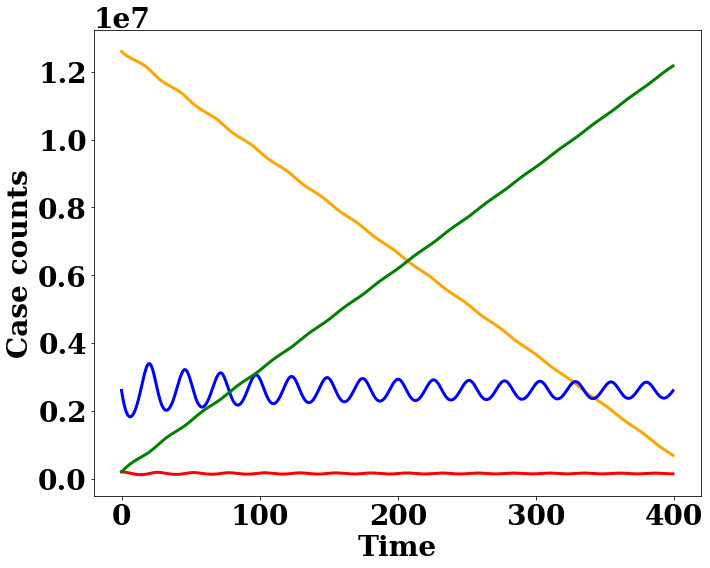

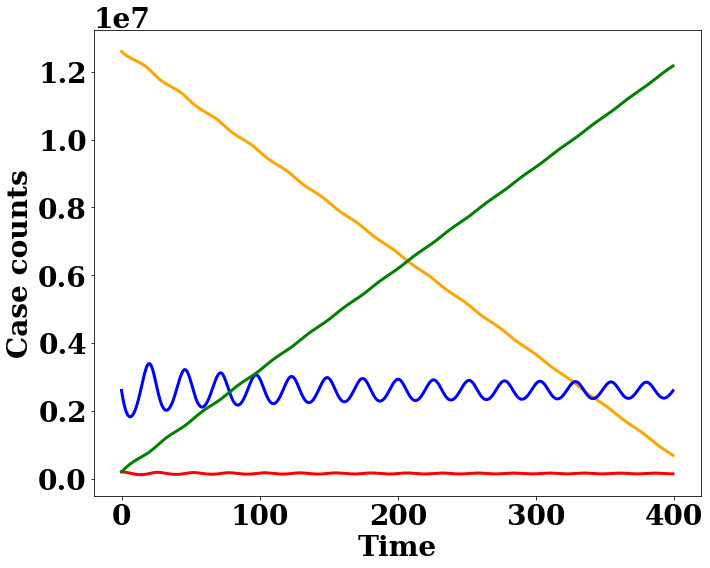

In [52]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.eps')

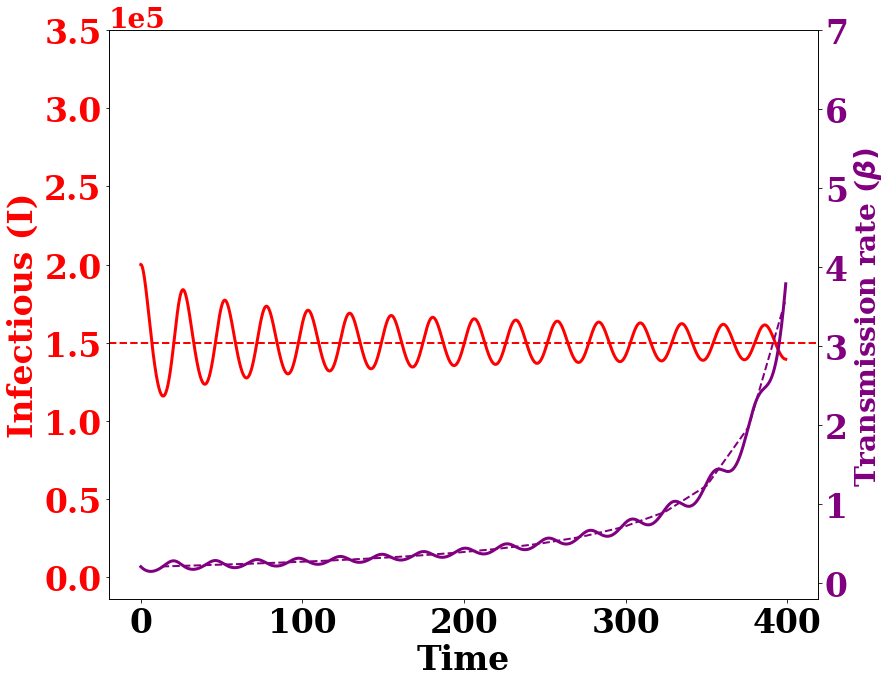

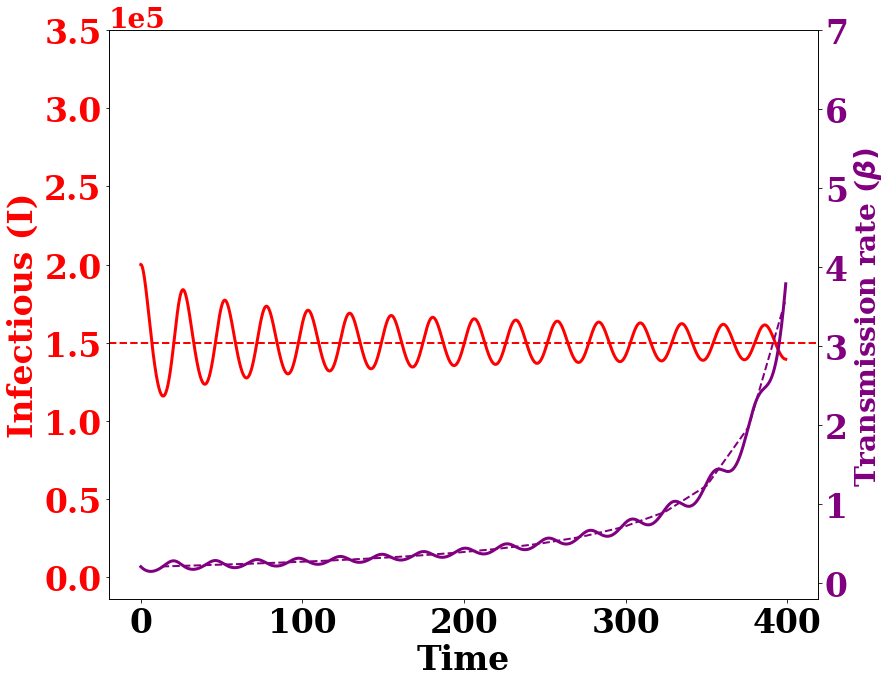

In [53]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7),Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7),Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


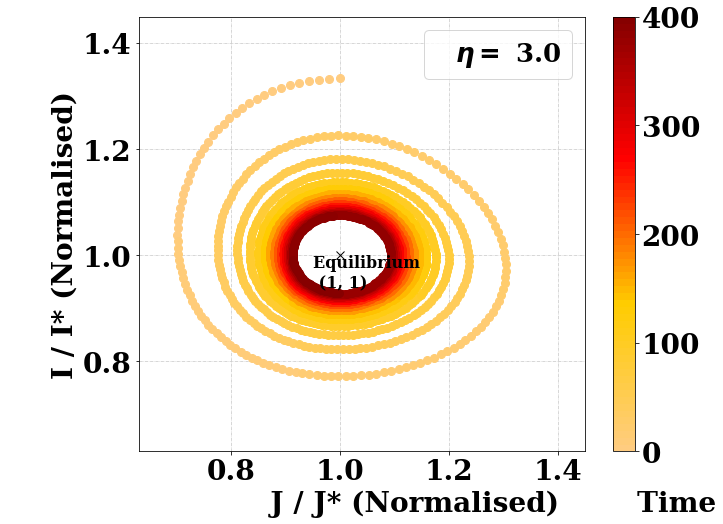

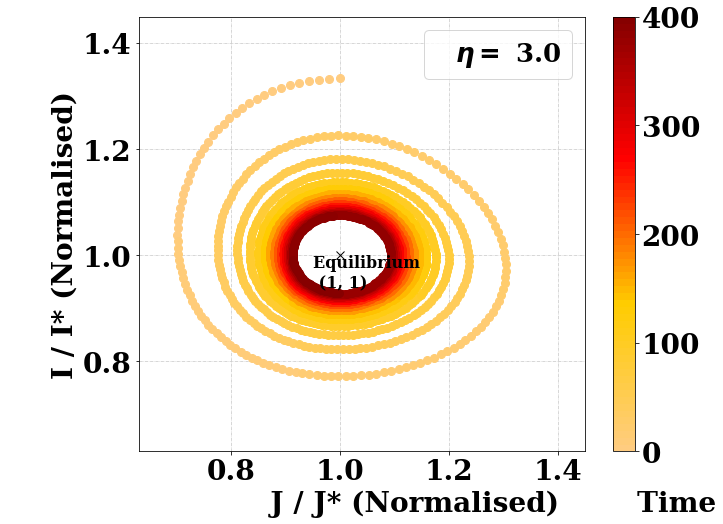

In [54]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infected',
#                  fig_name=f'SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png', xyscale = 'linear',
                                start = 0, stop = len(J), eta = eta)

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.eps', xyscale = 'linear',
                                start = 0, stop = len(J) , eta = eta)

In [55]:
eta = 20*gamma

In [56]:
S, I, R, beta = solve_sir_lv_control(S0, I0, R0, beta0, N, r, e, gamma, eta, t)
J = beta*S

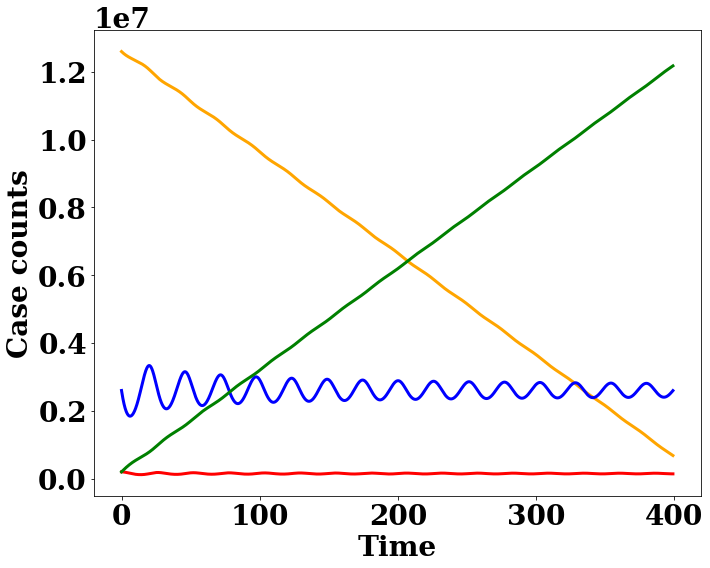

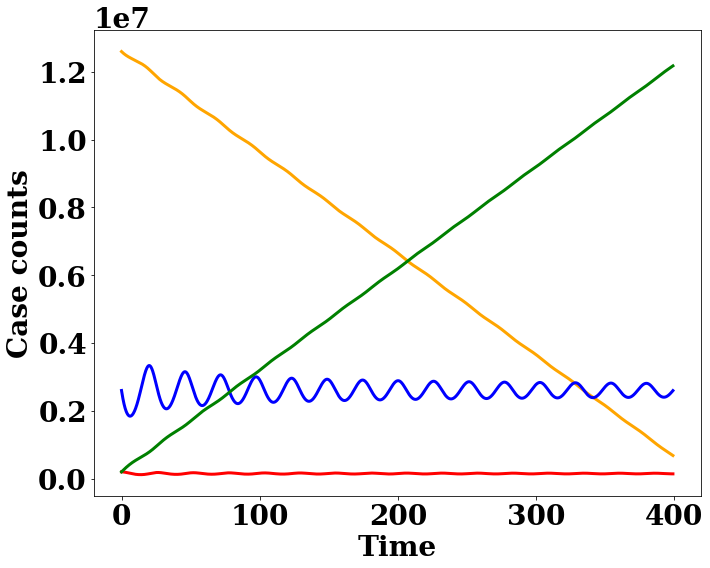

In [57]:
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.png')
plot_sir_lv(S, I, R, J, t, plt_title='', fig_name=f'plots/SIR-LV-control_dynamics_eta_{eta}.eps')

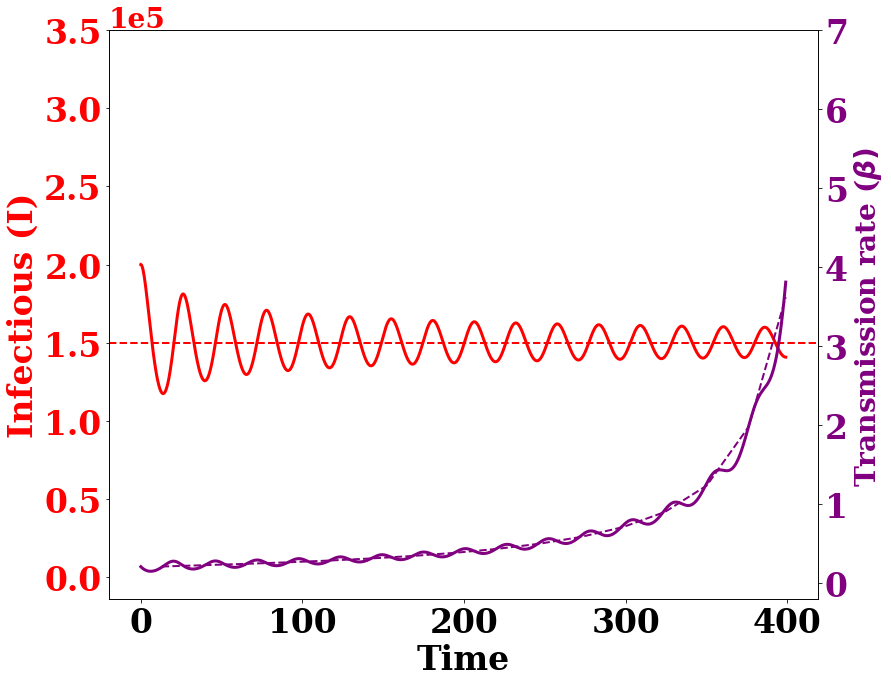

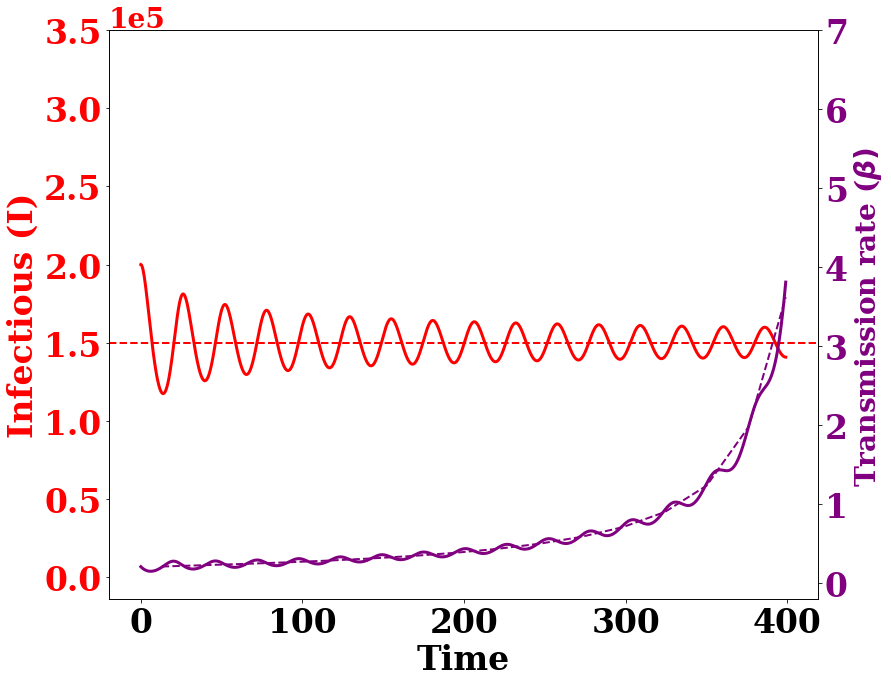

In [58]:
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7),Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.png')
plot_beta_I(beta, I, t, Ilim = (-14000, 350000), betalim = (-0.2, 7),Istar = (r/e), plt_title='', fig_name=f'plots/SIR-LV_beta-I-control-non_equilibrium_eta_{eta}.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


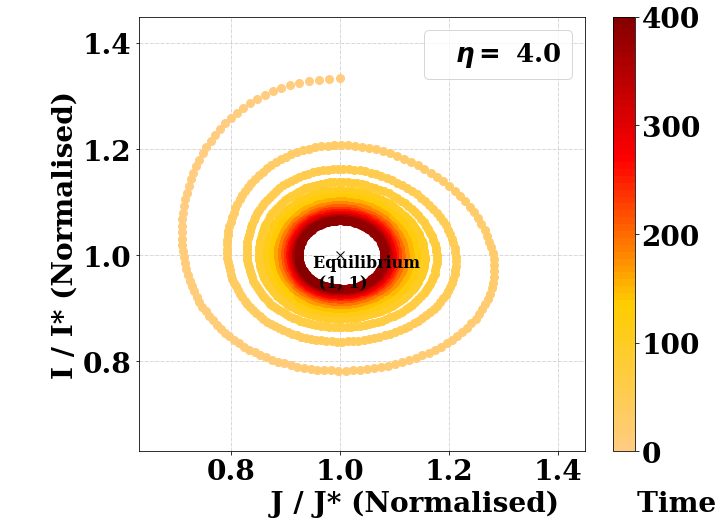

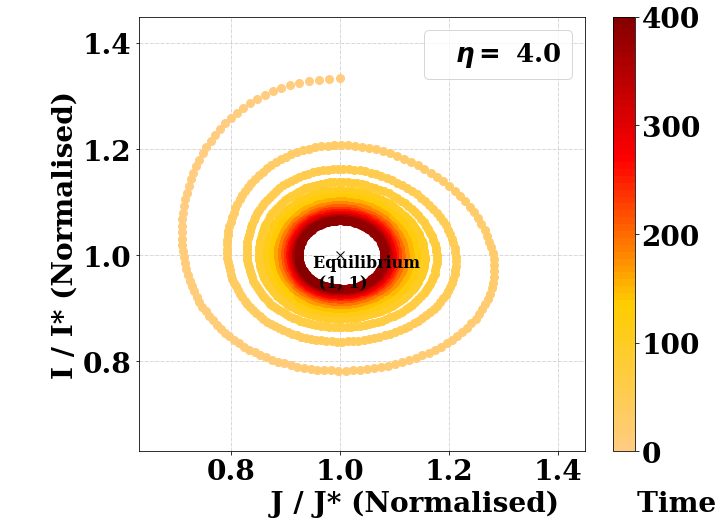

In [59]:
# plot_limit_cycle(J/Jstar, I/Istar, plt_title='', 
#                  label='', 
#                  xlabel='betaS',
#                  ylabel='Infected',
#                  fig_name=f'SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png')

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.png', xyscale = 'linear',
                                start = 0, stop = len(J), eta = eta)

plot_limit_cycle_color_gradient(J/Jstar, I/Istar, plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', fig_name =f'plots/SIR-LV-control-non-equilibrium_limit_cycle_eta_{eta}.eps', xyscale = 'linear',
                                start = 0, stop = len(J) , eta = eta)

# Single Cycle Annotated

In [60]:
def getMaxBetaSTimes(betaS, tolerance):
    timestamps = []
    m = np.max(betaS)
    for i in range(len(betaS)):
        if(betaS[i]> m - tolerance):
            timestamps.append(i)
    remove = []
    for i in range(1, len(timestamps)):
        if(timestamps[i] - timestamps[i-1] == 1):
            if(betaS[timestamps[i-1]] > betaS[timestamps[i]] + 1):
                remove.append(timestamps[i])
            else:
                remove.append(timestamps[i-1])
    for i in remove:
        timestamps.remove(i)
    return timestamps

In [61]:
N = 13000000
R0 = 200000
I0 = 200000
r = 3e-1
e = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 400, 1601)

In [62]:
S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
betaS = [beta[i]*S[i] for i in range(len(beta))]

In [63]:
timestamps = getMaxBetaSTimes(I, tolerance=1000)
print(timestamps)
T = []
for i in range(1, len(timestamps)):
    T.append(timestamps[i] - timestamps[i-1])

T = int(np.mean(T))
print(T/4)

[13, 121, 229, 336, 444, 551, 659, 766, 874, 982, 1089, 1197, 1304, 1412, 1519]
26.75


In [64]:
west = 41
north = 41+80
south = 41+35
east = 41+61

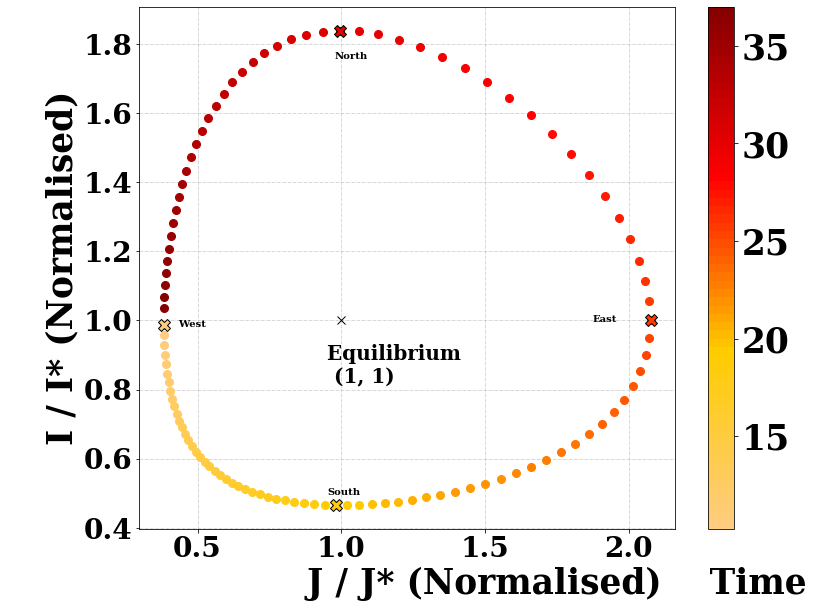

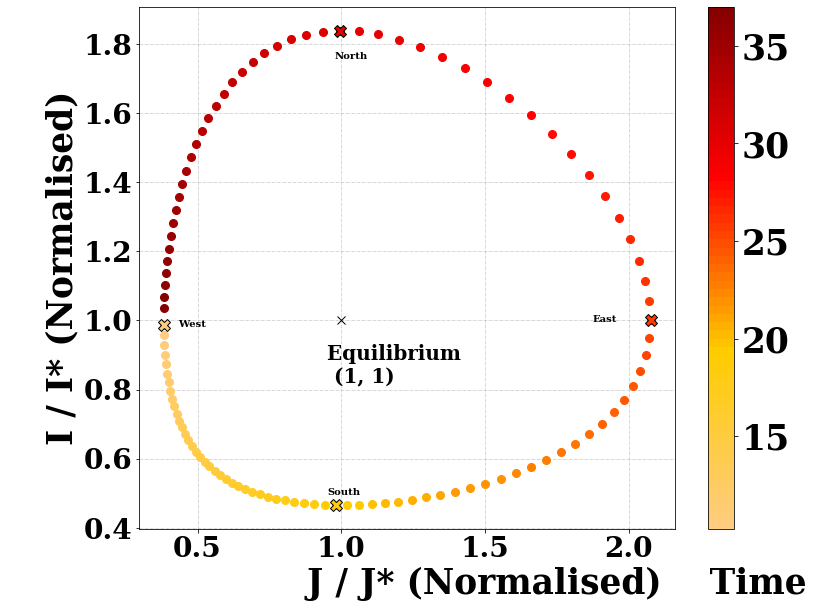

In [65]:
X = [bs/(gamma*N) for bs in betaS]
Y = [i/(r/e) for i in I]

plot_single_limit_cycle_color_gradient(X, Y, startCycle = 41, Tperiod = T, factor = 4, NEWS =(north, east, west, south),
                                       plt_title='', xlabel = 'J / J* (Normalised)', ylabel = 'I / I* (Normalised)',
                                       fig_name = 'plots/LimitCycle_NEWS_annotated.png', xyscale = 'linear')

plot_single_limit_cycle_color_gradient(X, Y, startCycle = 41, Tperiod = T, factor = 4, NEWS =(north, east, west, south),
                                       plt_title='', xlabel = 'J / J* (Normalised)', ylabel = 'I / I* (Normalised)',
                                       fig_name = 'plots/LimitCycle_NEWS_annotated.eps', xyscale = 'linear')
    
    

In [66]:
N = 13000000
R0 = 200000
I0 = 200000
r = 3e-1
e = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 800, 801)

In [67]:
S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
betaS = [beta[i]*S[i] for i in range(len(beta))]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


In [68]:
west = int((41)/4)
north = int((41+80)/4)
south = int((41+35)/4)
east = int((41+61)/4)
west1 = int(41/4 + 26)

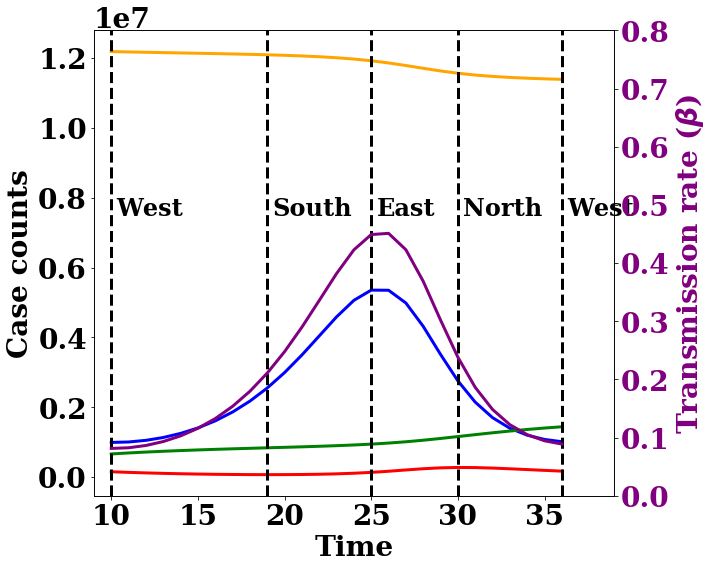

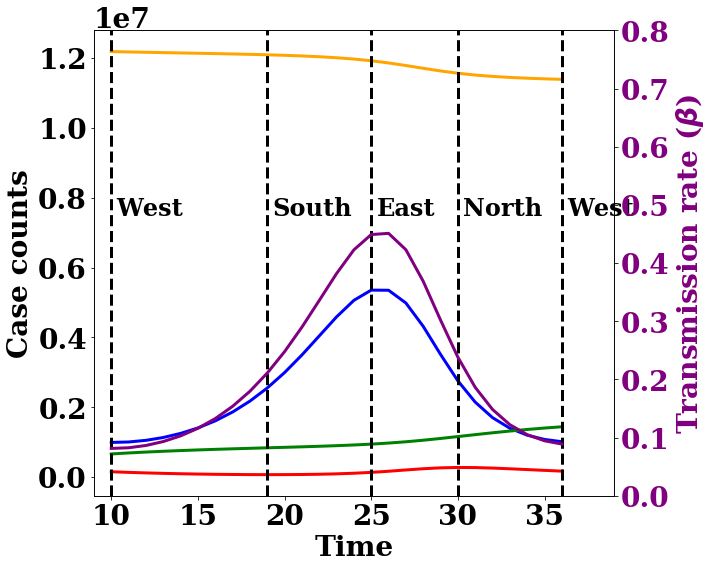

In [69]:
plot_sir_lv_oneCycle(S, I, R, betaS, beta, t, (north, east, west, south, west1), 27, fig_name = 'plots/SIR_oneCycle.png')
plot_sir_lv_oneCycle(S, I, R, betaS, beta, t, (north, east, west, south, west1), 27, fig_name = 'plots/SIR_oneCycle.eps')


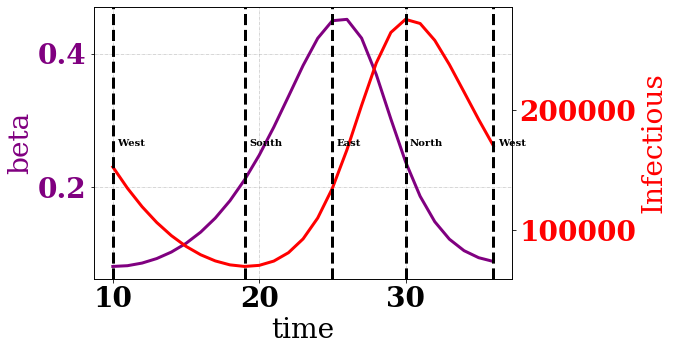

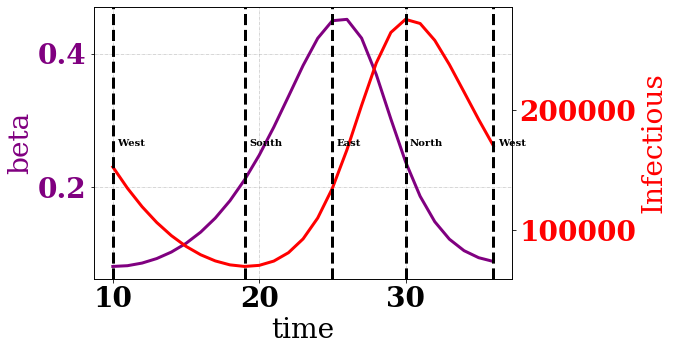

In [70]:
plot_beta_I_oneCycle(beta, I, t, (north, east, west, south, west1), 27, fig_name = 'plots/betaI_oneCycle.png')
plot_beta_I_oneCycle(beta, I, t, (north, east, west, south, west1), 27, fig_name = 'plots/betaI_oneCycle.eps')

# SIR, delayedSIR, SEIR

In [71]:
import numpy as np
import matplotlib.pyplot as plt
N = 13000000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.4, 0.2
num_tsteps = 300

init = (S0, I0, R0)
delta_t = 0.001

In [72]:
S_SIR, I_SIR, R_SIR = solve_discrete_sir(init, beta, gamma, N, num_tsteps, delta_t=delta_t)
J_SIR = beta*S_SIR
t = np.linspace(0, num_tsteps-1, num_tsteps)

tau = 4
S_delayedSIR, I_delayedSIR, R_delayedSIR = solve_discrete_delayedSir(init, beta, gamma, N, num_tsteps, delta_t=delta_t, tau=tau)
J_delayedSIR = beta*S_delayedSIR
t = np.linspace(0, num_tsteps-1, num_tsteps)



In [73]:
N = 13000000
E0, I0, R0 = 0, 1, 0
S0 = N - I0 - R0 - E0
beta, gamma, sigma = 0.4, 0.2, 1./5
num_tsteps = 300

init = (S0, E0, I0, R0)
delta_t = 0.001
S_SEIR, E_SEIR, I_SEIR, R_SEIR = solve_discrete_SEIR(init, beta, gamma, sigma, N, num_tsteps, delta_t=delta_t)
J_SEIR = beta*S_SEIR
t = np.linspace(0, num_tsteps-1, num_tsteps)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


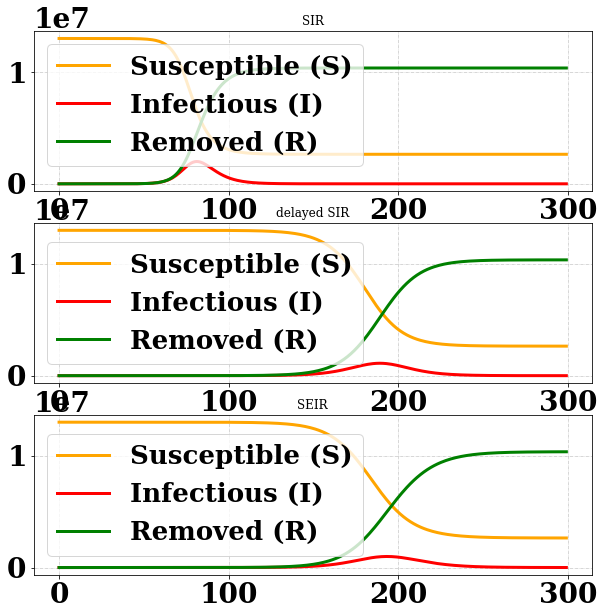

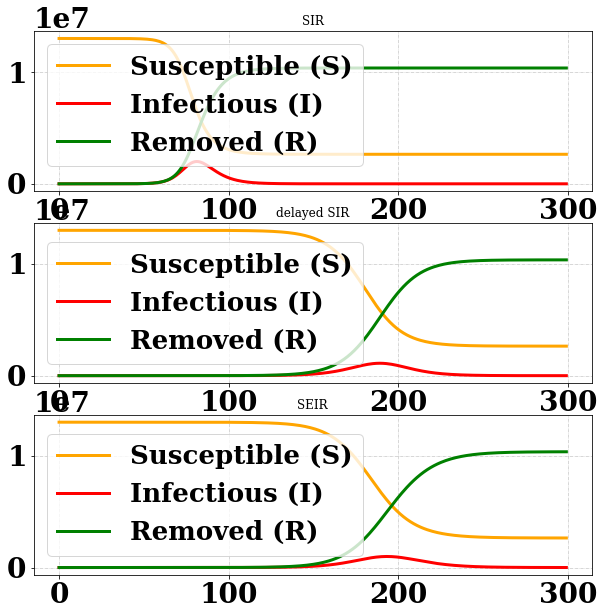

In [74]:
plot_SIR_dSIR_SEIR(t, S_SIR, S_delayedSIR, S_SEIR, 
                   I_SIR, I_delayedSIR, I_SEIR, 
                   R_SIR, R_delayedSIR, R_SEIR, fig_name = './plots/SIR_dSIR_SEIR.png')

plot_SIR_dSIR_SEIR(t, S_SIR, S_delayedSIR, S_SEIR, 
                   I_SIR, I_delayedSIR, I_SEIR, 
                   R_SIR, R_delayedSIR, R_SEIR, fig_name = './plots/SIR_dSIR_SEIR.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


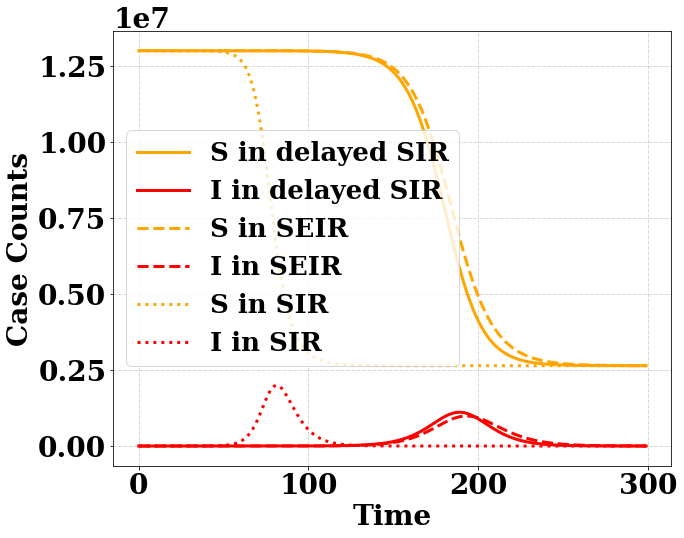

In [75]:
plt.figure(figsize = (10, 8))
plt.plot(t, S_delayedSIR, color = 'orange', label = "S in delayed SIR")
plt.plot(t, I_delayedSIR, color = 'red', label = "I in delayed SIR")

plt.plot(t, S_SEIR, label = "S in SEIR", color = 'orange', linestyle = '--')
plt.plot(t, I_SEIR, label = "I in SEIR", color = 'red', linestyle = '--')

plt.plot(t, S_SIR, color = 'orange', label = "S in SIR", linestyle = 'dotted')
plt.plot(t, I_SIR, color = 'red', label = "I in SIR", linestyle = 'dotted')

plt.legend()
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
plt.xlabel("Time" , weight = 'bold')
plt.ylabel("Case Counts", weight = 'bold')
plt.grid(linestyle='dashdot', linewidth=0.5)
plt.savefig('./plots/SIR_dSIR_SEIR.png')
plt.savefig('./plots/SIR_dSIR_SEIR.eps')

# delayedSIR Control

In [76]:
tau = 10
N = 13000000
R0 = 200000

r = 3e-1
e = 2e-6
I0 = 200000
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4


num_tsteps = 200

init = (S0, I0, R0, beta0)
delta_t = 0.001
t = np.linspace(0, num_tsteps-1, num_tsteps)

In [77]:
eta = 2
S_delayedSIR, I_delayedSIR, R_delayedSIR, beta_delayedSIR, Ws, Us = solve_discrete_delayedSIR_LV_Control(init, gamma, N, num_tsteps, r, e, delta_t=delta_t, tau=tau, eta = eta)
J_delayedSIR = beta_delayedSIR*S_delayedSIR

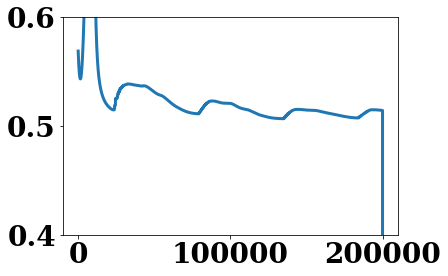

In [78]:
plt.ylim(0.4, 0.6)
plt.plot(range(len(Ws)), Ws)


In [79]:
Ws

array([0.56900876, 0.56897   , 0.56893127, ..., 0.51439304, 0.51439294,
       0.        ])

In [80]:
deltaWs = [Ws[i]-Ws[i-1] for i in range(1, len(Ws))]

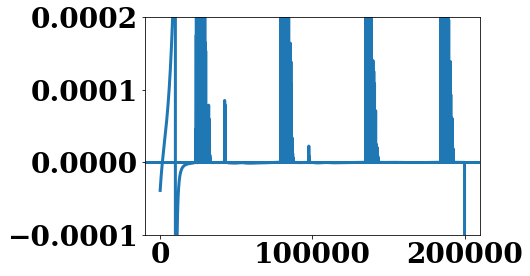

In [81]:
plt.ylim((-0.0001, 0.0002))
plt.axhline(y=0)
plt.plot(range(len(deltaWs)), deltaWs)

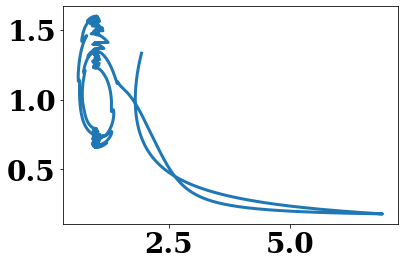

In [82]:
plt.plot(J_delayedSIR/(gamma*N), I_delayedSIR/(r/e))

In [83]:
Jstar_delayedSIR = gamma*N
Istar_delayedSIR = r/e
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.eps', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

plot_limit_cycle_color_gradient(J_delayedSIR[20:]/Jstar_delayedSIR, I_delayedSIR[20:]/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.png', xyscale = 'linear',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd4608edd08> (for post_execute):


KeyboardInterrupt: 

In [ ]:
eta = 0.5*gamma
S_delayedSIR, I_delayedSIR, R_delayedSIR, beta_delayedSIR, Ws_eta0dot5 = solve_discrete_delayedSIR_LV_Control(init, gamma, N, num_tsteps, r, e, delta_t=delta_t, tau=tau, eta = eta)
J_delayedSIR = beta_delayedSIR*S_delayedSIR

In [ ]:
Jstar_delayedSIR = gamma*N
Istar_delayedSIR = r/e
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.eps', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.png', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

In [ ]:
eta = 1*gamma
S_delayedSIR, I_delayedSIR, R_delayedSIR, beta_delayedSIR, Ws_eta0dot5 = solve_discrete_delayedSIR_LV_Control(init, gamma, N, num_tsteps, r, e, delta_t=delta_t, tau=tau, eta = eta)
J_delayedSIR = beta_delayedSIR*S_delayedSIR

In [ ]:
Jstar_delayedSIR = gamma*N
Istar_delayedSIR = r/e
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.eps', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.png', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

In [ ]:
eta = 8*gamma
S_delayedSIR, I_delayedSIR, R_delayedSIR, beta_delayedSIR, Ws_eta0dot5 = solve_discrete_delayedSIR_LV_Control(init, gamma, N, num_tsteps, r, e, delta_t=delta_t, tau=tau, eta = eta)
J_delayedSIR = beta_delayedSIR*S_delayedSIR

In [ ]:
Jstar_delayedSIR = gamma*N
Istar_delayedSIR = r/e
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.eps', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.png', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

In [ ]:
eta = 20*gamma
S_delayedSIR, I_delayedSIR, R_delayedSIR, beta_delayedSIR, Ws_eta0dot5 = solve_discrete_delayedSIR_LV_Control(init, gamma, N, num_tsteps, r, e, delta_t=delta_t, tau=tau, eta = eta)
J_delayedSIR = beta_delayedSIR*S_delayedSIR

In [ ]:
Jstar_delayedSIR = gamma*N
Istar_delayedSIR = r/e
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.eps', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.png', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

In [ ]:
eta = 50*gamma
S_delayedSIR, I_delayedSIR, R_delayedSIR, beta_delayedSIR, Ws_eta0dot5 = solve_discrete_delayedSIR_LV_Control(init, gamma, N, num_tsteps, r, e, delta_t=delta_t, tau=tau, eta = eta)
J_delayedSIR = beta_delayedSIR*S_delayedSIR

In [ ]:
Jstar_delayedSIR = gamma*N
Istar_delayedSIR = r/e
plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.eps', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

plot_limit_cycle_color_gradient(J_delayedSIR/Jstar_delayedSIR, I_delayedSIR/Istar_delayedSIR, 
                                plt_title = '', xlabel = 'J / J* (Normalised)',
                                ylabel= 'I / I* (Normalised)', 
                                fig_name =f'plots/delayed_SIR_eta_{eta}.png', xyscale = 'log',
                                start = 0, stop = len(J_delayedSIR), eta = eta)

# TPeriod Varying r

In [ ]:
def getTimePeriodV2(series):
    timestamps = []
    for i in range(1, len(series)-1):
        if(series[i]>series[i-1] and series[i] > series[i+1]):
            timestamps.append(i)
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    return T

In [ ]:
N = 13000000
R0 = 200000
rstar = 3e-1
estar = 2e-6
gamma = 0.2
t = np.linspace(0, 400, 401)
Istar = rstar/estar

In [ ]:
import math
alphas = [0.01, 0.1, 0.2, 0.3, 0.4]
I0s = range(150000, 600000, 1000)
alphaI0 = dict()
for I0 in I0s:
    x = I0/Istar
    alphaI0[I0] = (x - math.log(x) - 1)
    



In [ ]:
alphaI0

In [ ]:
alphas = {0.01:173000, 0.03:190000, 0.1:228000, 0.3: 298000, 0.5:354000}

In [ ]:
alphaT = dict()
for alpha, I0 in alphas.items():
    S0  = N - I0  - R0
    beta0 = gamma*N/S0
    rValues = [i*0.1 for i in range(1, 60)]
    alphaT[alpha] = []
    for r in rValues:
        e = r/Istar
        S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
        T = getTimePeriodV2(I[:300])
#         print(r,  T, I0)
        alphaT[alpha].append(T)    

In [ ]:
font = {'family':'serif','size':16}
plt.rc('font',**font)
plt.style.use('./presentation.mplstyle')

plt.figure(figsize = (10,8))
for alpha, T in alphaT.items():
    plt.plot(rValues, T, alpha = 1, label = r'$w_0/r = $' + str(alpha))
tprd = [(2*math.pi)/(math.sqrt(r * gamma)) for r in rValues]
plt.plot(rValues, tprd, linestyle = '--', alpha = 0.5, color = 'black', label = r'$ \frac{2*\pi}{\sqrt{r\gamma}} $')
plt.legend()
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
plt.xlabel(r"$r$", weight = 'bold', )
plt.ylabel(r"$T_{period}$", weight = 'bold', )
# plt.grid(linestyle='dashdot', linewidth=0.5)
plt.savefig('./plots/TperiodVsr_w0.png')
plt.savefig('./plots/TperiodVsr_w0.eps')

In [ ]:
N = 13000000
R0 = 200000
I0 = 200000
rstar = 3e-1
estar = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 800, 801)
Istar = rstar/estar

In [ ]:
rValues = [rstar + float(i)/1000 for i in range(-200, 5000, 100)]
Tperiods_I0_200000 = []
for r in rValues:
    e = r/Istar
    S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
    betaS = [beta[i]*S[i] for i in range(len(beta))]
    timestamps = getMaxBetaSTimes(I[:400], tolerance = 10000)
#     print(r, timestamps)
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    print(r, T)
    Tperiods_I0_200000.append(T)

In [ ]:
N = 13000000
R0 = 200000
I0 = 100000
rstar = 3e-1
estar = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 800, 801)
Istar = rstar/estar

Tperiods_I0_100000 = []
for r in rValues:
    e = r/Istar
    S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
    betaS = [beta[i]*S[i] for i in range(len(beta))]
    timestamps = getMaxBetaSTimes(I[:400], tolerance = 20000)
#     print(r, timestamps)
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    print(r, T)
    Tperiods_I0_100000.append(T)

In [ ]:
N = 13000000
R0 = 200000
I0 = 300000
rstar = 3e-1
estar = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 800, 801)
Istar = rstar/estar

Tperiods_I0_300000 = []
for r in rValues:
    e = r/Istar
    S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
    betaS = [beta[i]*S[i] for i in range(len(beta))]
    timestamps = getMaxBetaSTimes(I[:400], tolerance = 50000)
#     print(r, timestamps)
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    print(r, T)
    Tperiods_I0_300000.append(T)

In [ ]:
N = 13000000
R0 = 200000
I0 = 50000
rstar = 3e-1
estar = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 800, 801)
Istar = rstar/estar

Tperiods_I0_50000 = []
for r in rValues:
    e = r/Istar
    S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
    betaS = [beta[i]*S[i] for i in range(len(beta))]
    timestamps = getMaxBetaSTimes(I[:400], tolerance = 50000)
#     print(r, timestamps)
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    print(r, T)
    Tperiods_I0_50000.append(T)

In [ ]:
N = 13000000
R0 = 200000
I0 = 400000
rstar = 3e-1
estar = 2e-6
gamma = 0.2
S0 = N - I0 - R0
beta0 = 0.4
t = np.linspace(0, 800, 801)
Istar = rstar/estar

Tperiods_I0_400000 = []
for r in rValues:
    e = r/Istar
    S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
    betaS = [beta[i]*S[i] for i in range(len(beta))]
    timestamps = getMaxBetaSTimes(I[:400], tolerance = 50000)
#     print(r, timestamps)
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    print(r, T)
    Tperiods_I0_400000.append(T)

In [ ]:
import math 
plt.plot(rValues, Tperiods_I0_50000, label = "I0 = 0.5e+5")
plt.plot(rValues, Tperiods_I0_100000, label = "I0 = 1e+5")
plt.plot(rValues, Tperiods_I0_200000, label = "I0 = 2e+5")
plt.plot(rValues, Tperiods_I0_300000, label = "I0 = 3e+5")
plt.plot(rValues, Tperiods_I0_400000, label = "I0 = 4e+5")

plt.grid(linestyle='dashdot', linewidth=0.5)
plt.xlabel("r")
plt.ylabel("Tperiod")
plt.legend()
plt.savefig('plots/TperiodVsr.png')

In [ ]:
def getTimePeriodV2(series):
    timestamps = []
    for i in range(1, len(series)-1):
        if(series[i]>series[i-1] and series[i] > series[i+1]):
            timestamps.append(i)
#     print(timestamps)        
    T = []
    for i in range(1, len(timestamps)):
        T.append(timestamps[i] - timestamps[i-1])

    T = np.mean(T)
    return T

In [ ]:
N = 13000000
R0 = 200000

rstar = 3e-1
estar = 2e-6
Istar = rstar/estar

gamma = 0.2

t = np.linspace(0, 400, 401)

In [ ]:
I0 = 200000
float(I0)/Istar - math.log(float(I0)/Istar) - 1


In [ ]:
import math
TPeriodDict = dict()
for I0 in range(30000, 300001, 10000):
    print(I0)
    alpha = float(I0)/Istar - math.log(float(I0)/Istar) - 1
    TPeriodDict[alpha] = dict()
    S0 = N - I0 - R0
    beta0 = gamma*N/S0
    for rx10 in range(1, 61):
        r = float(rx10)/10
        e = r/Istar
        S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
        T = getTimePeriodV2(I[:300])
        TPeriodDict[alpha][r] = T
        


In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(TPeriodDict)

In [ ]:
df.head()

In [ ]:
df = df.sort_index(axis = 1)
df.head()

In [ ]:
# df.to_csv('/Users/harsh.maheshwari/Desktop/covid-forecasting/betaControl/Code/Tperiod_r_alpha.csv')

In [ ]:
I0 = 30000
print(I0)
alpha = float(I0)/Istar - math.log(float(I0)/Istar) - 1
TPeriodDict[alpha] = dict()
S0 = N - I0 - R0
beta0 = gamma*N/S0
for rx10 in range(1, 61):
    r = float(rx10)/10
    e = r/Istar
    S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)
    T = getTimePeriodV2(I[:50])
    print(r, T)


In [ ]:
betaS = [beta[i]*S[i] for i in range(len(S))]

In [ ]:
plt.plot(t[:100], S[:100])

In [ ]:
beta0

In [ ]:
N = 13000000
R0 = 200000
I0 = 30000
rstar = 3e-1
estar = 2e-6
Istar = rstar/estar
r  = 5.1
e = r/Istar
gamma = 0.2
print(r, e)
t = np.linspace(0, 400, 401)

In [ ]:
S, I, R, beta = solve_sir_lv(S0, I0, R0, beta0, N, r, e, gamma, t)

In [ ]:
start = 0
stop  = 20
plt.plot(t[start:stop], S[start:stop])
plt.plot(t[start:stop], I[start:stop])
plt.plot(t[start:stop], R[start:stop])

In [ ]:
plt.plot(t[start:stop], beta[start:stop])

# Practical Simulation with Various beta(t)

In [2]:
beta_dict = {}
S_dict = {}
I_dict = {}

In [3]:
N = 13000000
R0 = 200000
I0 = 200000
Istar = 150000
r = 4.2
e = r/Istar
gamma = 0.2
S0 = N - I0 - R0
beta0 = gamma*N/S0
# Istar = r/e
Jstar = gamma*N
init = (S0, I0, R0)
delta_t = 0.001

tsteps = 190
t = np.linspace(0, tsteps-1, tsteps)
eta = 1
# i = np.zeros(tsteps)
spikes = [(50, 100000), (100, -100000)]
# for (pos, spike) in spikes:
#     i[pos] = spike

In [4]:
from scipy.interpolate import make_interp_spline

y = [0.2063, 0.22, 0.22, 0.2263, 0.33,0.33, 0.3, 0.45, 0.60, 0.55, 0.55, 0.55,  0.55]
n = len(y)-1
x = [tsteps*i/n for i in range(n+1)]
cs = make_interp_spline(x, y)
beta_arbitrary = cs(range(tsteps))
beta_dict['Hypothetical'] = beta_arbitrary

In [5]:
S_arbitrary, I_arbitrary, R_arbitrary = solve_discrete_sir_jump(init, beta_arbitrary, gamma, N, tsteps, spikes = spikes, delta_t=delta_t)
J_arbitrary = beta_arbitrary*S_arbitrary

S_dict['Hypothetical'] = S_arbitrary
I_dict['Hypothetical'] = I_arbitrary

[(50, 100000), (100, -100000)]
At 50.0 I goes up by 100000
At 50.0 S goes down by 100000
At 100.0 I goes up by -100000
At 100.0 R goes down by -100000


In [6]:
S_ideal, I_ideal, R_ideal, beta_ideal = {}, {}, {} , {}
S_ideal[0], I_ideal[0], R_ideal[0], beta_ideal[0] = solve_sir_lv_control(
    S0, I0, R0, beta0, N, r, e, gamma, eta, t[:spikes[0][0]])

# S_ideal[0], I_ideal[0], R_ideal[0] = solve_discrete_sir(
#     init, beta_ideal[0], gamma, N, spikes[0][0], delta_t=delta_t, i=i)

# %matplotlib inline
# fig, ax = plt.subplots(3,1)
# ax[0].plot(range(spikes[0][0]), S_ideal[0])
# ax[1].plot(range(spikes[0][0]), I_ideal[0])
# ax[2].plot(range(spikes[0][0]), beta_ideal[0])

In [7]:
beta0New = gamma*N/S_ideal[0][-1]
S_ideal[1], I_ideal[1], R_ideal[1], beta_ideal[1] = solve_sir_lv_control(
    S_ideal[0][-1] - spikes[0][1], I_ideal[0][-1]+spikes[0][1], R_ideal[0][-1], beta0New, N, r, e, gamma, eta, 
    t[spikes[0][0]:spikes[1][0]])

beta0New = gamma*N/S_ideal[1][-1]
S_ideal[2], I_ideal[2], R_ideal[2], beta_ideal[2] = solve_sir_lv_control(
    S_ideal[1][-1]-spikes[1][1], I_ideal[1][-1]+spikes[1][1], R_ideal[1][-1], beta0New, N, r, e, gamma, eta, 
    t[spikes[1][0]:])

In [8]:
beta_ideal = np.concatenate(list(beta_ideal.values()))
S_ideal = np.concatenate(list(S_ideal.values()))
I_ideal = np.concatenate(list(I_ideal.values()))

beta_dict['CoSIR'] = beta_ideal
S_dict['CoSIR'] = S_ideal
I_dict['CoSIR'] = I_ideal

In [9]:
def find_approximation(beta, klevels, loss_function):
    """
        Find the best approximation of beta (m,) sized array
        based on one of the klevels (k,) sized array. The
        goodness of approximation is based on 

        loss_function: (y, y_hat) -> R (positive reals)

        Returns: beta_approx (m,) sized array
        such that: 
            
            \sum_t loss_function(beta_approx(t), beta(t))
        i.e. pointwise loss values are minimized.

        Since, loss_function is positive and pointwise,
        elementwise minimum should minimise the global objective.

        TODO: Should we impose some sort of smoothness constraint
        on beta_approx(t) ?
    """
    num_steps = np.shape(beta)[0]
    num_levels = np.shape(klevels)[0]
    
    #TODO: Try out a vectorized implementation
    beta_approx = []
    for t in range(num_steps):
        beta_val = beta[t]
        losses = loss_function(beta_val, klevels)
        best_beta = klevels[np.argmin(losses)]
        beta_approx.append(best_beta)

    beta_approx = np.array(beta_approx)
    return beta_approx

In [10]:
klevels = np.array([0.1*i for i in range(1,6)])
loss_function = lambda x,y: (x-y)**2
beta_approx_v0 = find_approximation(beta_ideal, klevels, loss_function)

In [11]:
S_approx_v0, I_approx_v0, R_approx_v0 = solve_discrete_sir_jump(init, beta_approx_v0, gamma, N, tsteps, 
                                                                spikes = spikes, delta_t=delta_t)
J_approx_v0 = beta_approx_v0*S_approx_v0

beta_dict['CoSIR-approx'] = beta_approx_v0
S_dict['CoSIR-approx'] = S_approx_v0
I_dict['CoSIR-approx'] = I_approx_v0

[(50, 100000), (100, -100000)]
At 50.0 I goes up by 100000
At 50.0 S goes down by 100000
At 100.0 I goes up by -100000
At 100.0 R goes down by -100000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

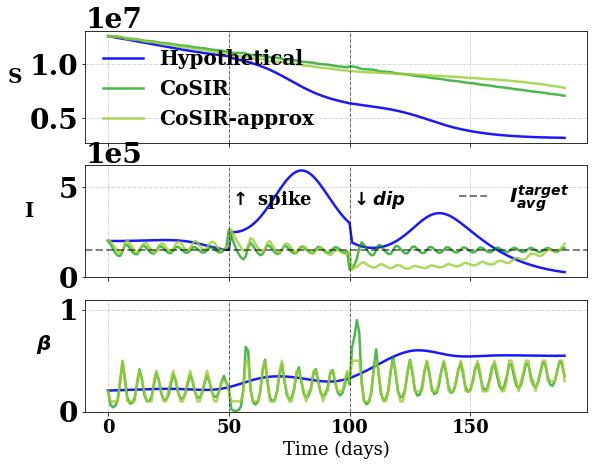

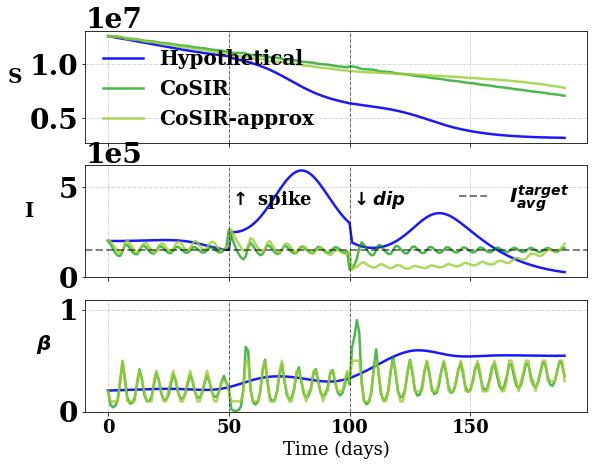

In [12]:
plot_S_I_beta(S_dict, I_dict, beta_dict, t, plt_title = '', spikes= spikes, fig_name='plots/arbit_ideal_approx_v0_reinitialise.png')
plot_S_I_beta(S_dict, I_dict, beta_dict, t, plt_title = '', spikes= spikes, fig_name='plots/arbit_ideal_approx_v0_reinitialise.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

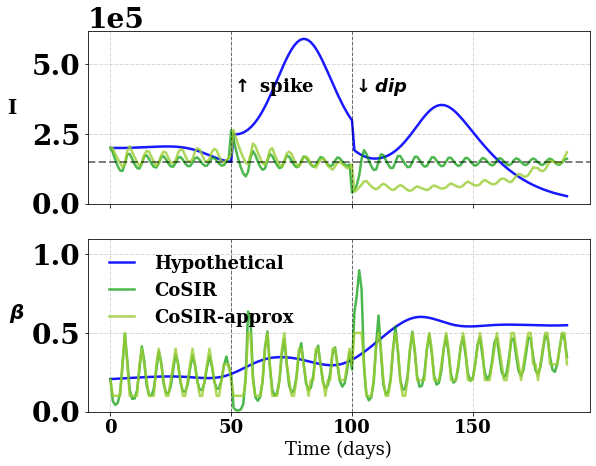

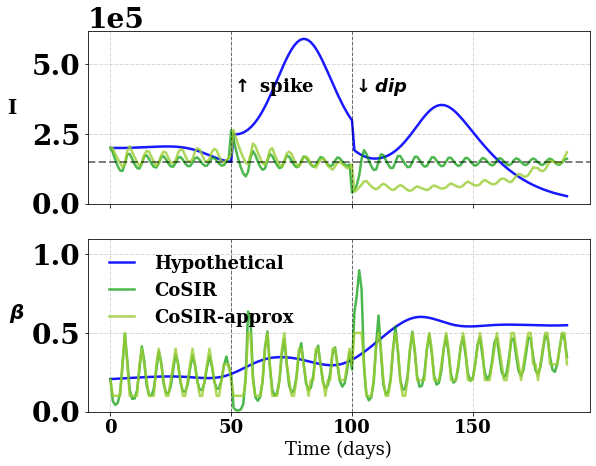

In [13]:
plot_I_beta(I_dict, beta_dict, t, plt_title = '', spikes= spikes, fig_name='plots/arbit_ideal_approx_v0_reinitialise_I_beta.png')
plot_I_beta(I_dict, beta_dict, t, plt_title = '', spikes= spikes, fig_name='plots/arbit_ideal_approx_v0_reinitialise_I_beta.eps')